In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict
import os
import sklearn
from sklearn import linear_model
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
def FindNoise(file_name, dFrame):
    """
    Helper function to display experimental noise in a data set 
    @param file_name: name of file/data set 
    @param dFrame: pandas df containing dataset 
    """
    duplicates = dFrame[dFrame.duplicated(subset = ['Compound', 'T, K'], keep = False)]

    groups = duplicates.groupby(['Compound', 'T, K']).describe().reset_index()

    # SE is the standard error for each group
    groups['SE'] = groups['B, cm3/mol^-1', 'std'] / np.sqrt(groups['B, cm3/mol^-1', 'count'])

    # scatter plot of temperature and STD (color of points is the compound)
    groups['compoundLabel'] = groups['Compound', ''].rank(method='dense', ascending=False).astype(int)
    groups.plot.scatter(x=('T, K', ''), y=('B, cm3/mol^-1', 'std'), c='compoundLabel', cmap='gist_rainbow', title = file_name)

    # scatter plot of temperature and SE (color of points is the compound)
    groups.plot.scatter(x=('T, K', ''), y=('SE', ''), c='compoundLabel', cmap='gist_rainbow', title = file_name)


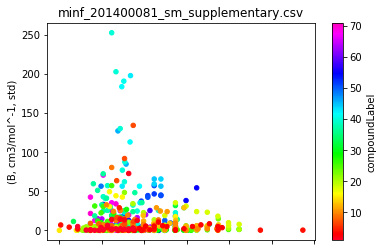

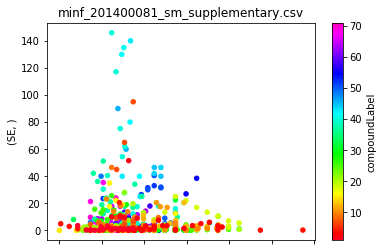

In [4]:
# this is the main file being analyzed throughout this code

csv_file1 = os.path.join('Desktop', 'minf_201400081_sm_supplementary.csv') # use this
dFrame = pd.read_csv(csv_file1, usecols = [0,1,2])
FindNoise('minf_201400081_sm_supplementary.csv', dFrame)

                                             Compound    T, K B, cm3/mol^-1  \
                                                                      count   
0                   1 1 1 2-Tetrafluoroethane+Propane  299.93           2.0   
1                   1 1 1 2-Tetrafluoroethane+Propane  313.15           2.0   
2                   1 1 1 2-Tetrafluoroethane+Propane  328.15           2.0   
3                   1 1 1 2-Tetrafluoroethane+Propane  343.15           2.0   
4                       Acetonitrile+Methyl ethanoate  406.65           2.0   
5                       Acetonitrile+Methyl ethanoate  419.95           2.0   
6                                 Benzene+Cyclohexane  343.20           2.0   
7                                      Benzene+Hexane  298.15           2.0   
8                                      Benzene+Hexane  323.15           2.0   
9                                      Benzene+Hexane  348.15           4.0   
10                                     Benzene+Hexan

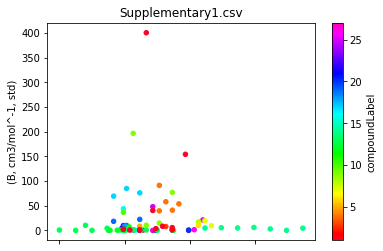

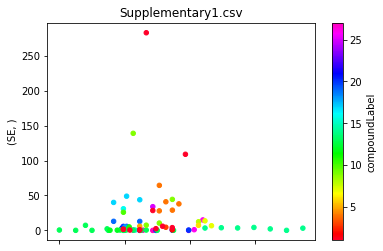

In [50]:
# first supplementary file - not used beyond this point

csv_file2 = os.path.join('Desktop', 'Supplementary1.csv')
dFrame2 = pd.read_csv(csv_file2, usecols = [0,1,2])
dFrame2.columns = ['Compound', 'T, K', 'B, cm3/mol^-1' ]
FindNoise('Supplementary1.csv', dFrame2)

                                         Compound    T, K B, cm3/mol^-1  \
                                                                  count   
0    Chlorotrifluoromethane+Chlorodifluoromethane  300.70           2.0   
1   Chlorotrifluoromethane+Trichlorofluoromethane  302.20           2.0   
2  Dichlorodifluoromethane+Trichlorofluoromethane  302.20           2.0   
3        Dichlorodifluoromethane+Trifluoromethane  300.50           3.0   
4                             Ethanol+Pentylamine  363.15           2.0   
5         Trichlorofluoromethane+Trifluoromethane  302.20           2.0   

                                                                           SE  \
      mean        std     min       25%      50%       75%     max              
0  -270.60   6.646804  -275.3  -272.950  -270.60  -268.250  -265.9   4.700000   
1  -437.95  14.778532  -448.4  -443.175  -437.95  -432.725  -427.5  10.450000   
2  -439.30  10.040916  -446.4  -442.850  -439.30  -435.750  -432.2   7.1000

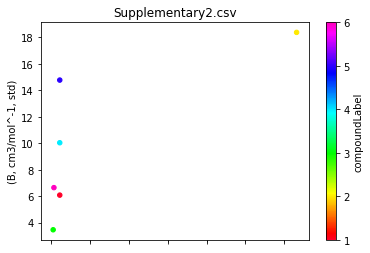

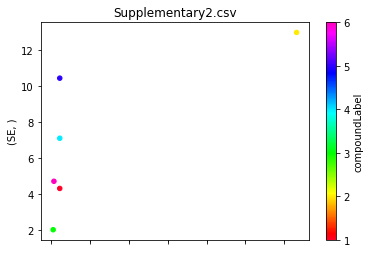

In [7]:
# second supplementary file - not used beyond this point

csv_file3 = os.path.join('Desktop', 'Supplementary2.csv')
dFrame3 = pd.read_csv(csv_file3, usecols = [0,1,2])
dFrame3.columns = ['Compound', 'T, K', 'B, cm3/mol^-1' ]
FindNoise('Supplementary2.csv', dFrame3)

In [5]:
# for further calculations, we are using this dataframe, based on minf_201400081_sm_supplementary.csv
dFrame = dFrame.rename(columns={"B, cm3/mol^-1":"B", "T, K":"T"})

# making a separate pandas data frame for data on each compound
compound_data = dict()
for compound in dFrame.Compound.unique(): 
    compound_data[compound] = dFrame[dFrame['Compound']==compound]                                     

b:[[-131855.01426619]]
a:[153.84151974]


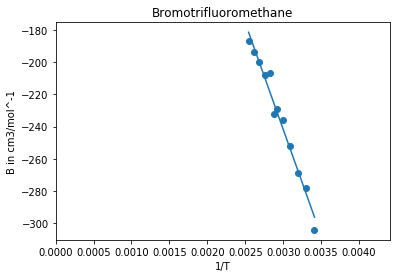

b:[[-140576.41376922]]
a:[238.93430143]


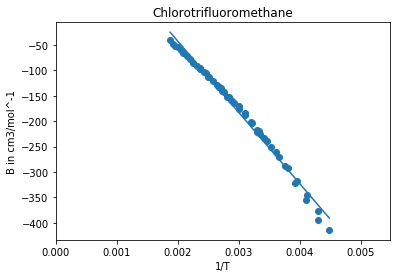

b:[[-287039.73713565]]
a:[481.84849631]


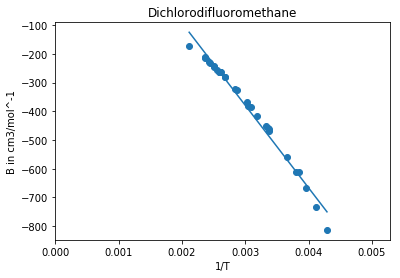

b:[[-318578.43961306]]
a:[387.37475239]


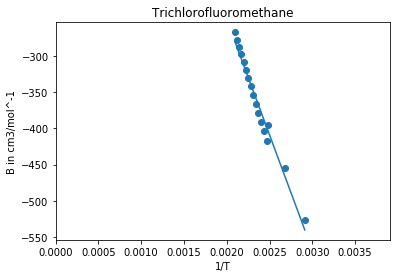

b:[[-789053.56750189]]
a:[1149.87178571]


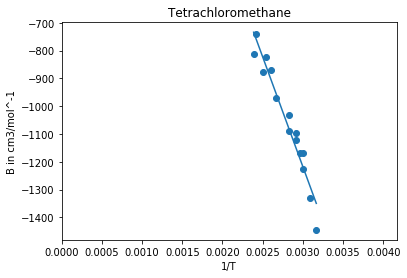

b:[[-408458.74918732]]
a:[804.0713555]


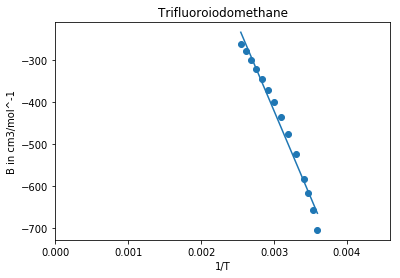

b:[[-70477.14085217]]
a:[140.68564572]


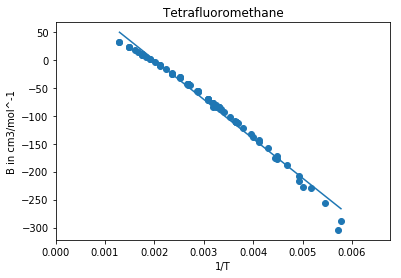

b:[[-1752387.37474076]]
a:[4363.82580308]


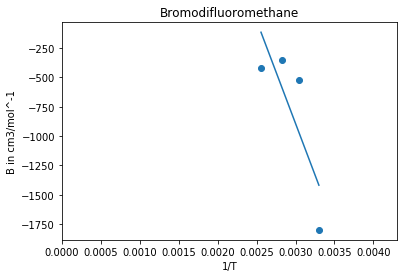

b:[[-245655.93214329]]
a:[441.30596185]


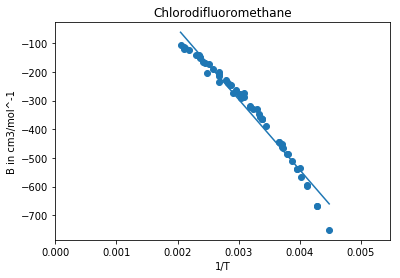

b:[[-256881.85776326]]
a:[299.67105445]


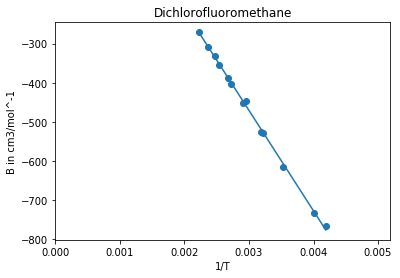

b:[[-670221.76279066]]
a:[1099.16475334]


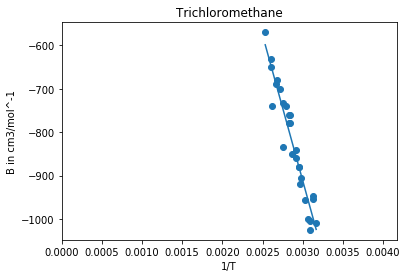

b:[[-132480.22363841]]
a:[251.1132994]


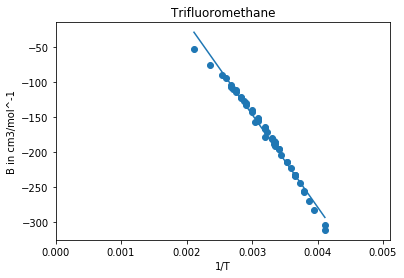

b:[[-422705.31175301]]
a:[648.05164463]


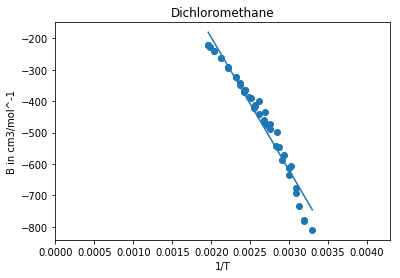

b:[[-204537.02044495]]
a:[383.73303544]


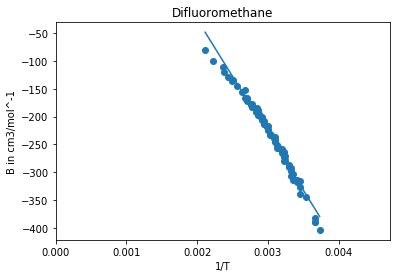

b:[[-576172.14277235]]
a:[1377.25495621]


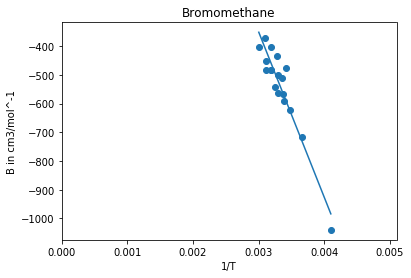

b:[[-211789.71292769]]
a:[313.28144022]


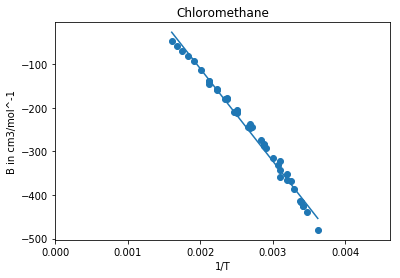

b:[[-134169.5354555]]
a:[241.26789046]


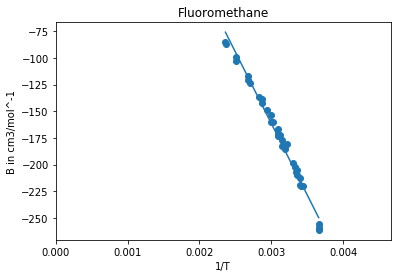

b:[[-557343.37375843]]
a:[1097.2241853]


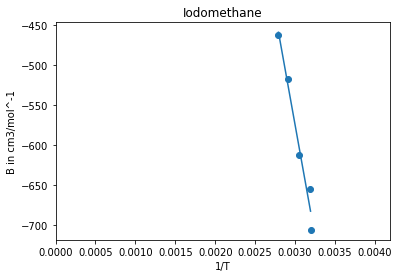

b:[[-3163054.98965777]]
a:[6859.16682919]


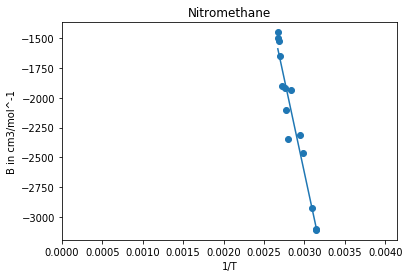

b:[[-42236.26062212]]
a:[94.01985216]


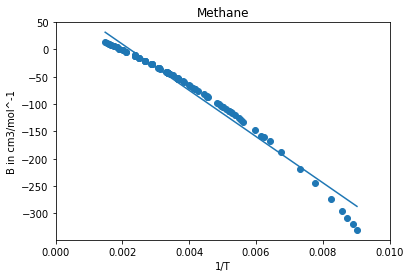

b:[[-761788.58488727]]
a:[1361.67803881]


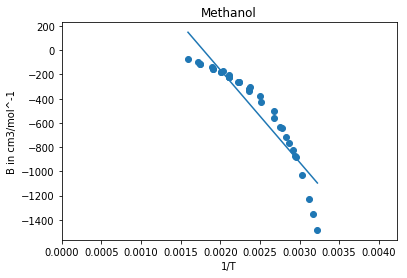

b:[[-249836.88783814]]
a:[375.17970004]


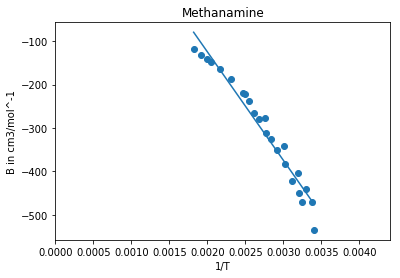

b:[[-268179.38627689]]
a:[443.52084618]


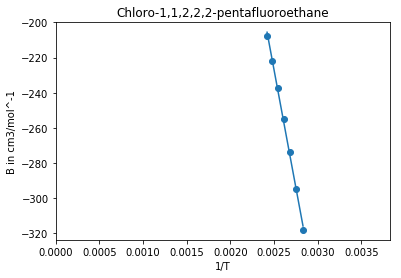

b:[[-473045.10948863]]
a:[801.19679212]


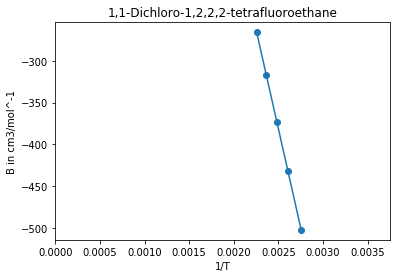

b:[[-473444.89765925]]
a:[756.41290264]


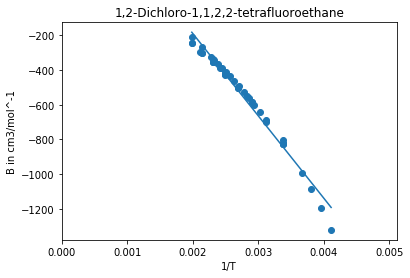

b:[[-440891.08112407]]
a:[479.56295717]


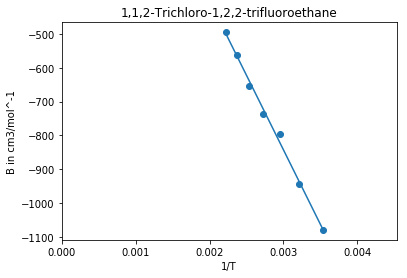

b:[[-93726.99063301]]
a:[139.5590213]


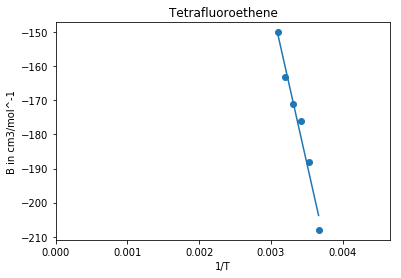

b:[[-246712.22244752]]
a:[584.73385417]


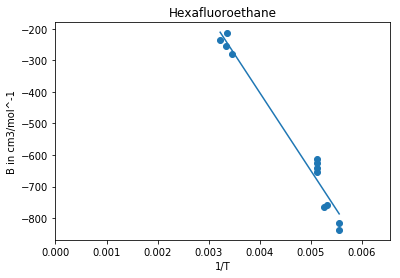

b:[[-1082942.2189]]
a:[2261.206]


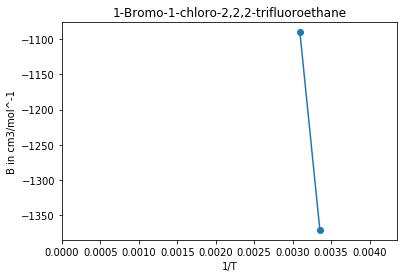

b:[[-217404.14402654]]
a:[288.53364769]


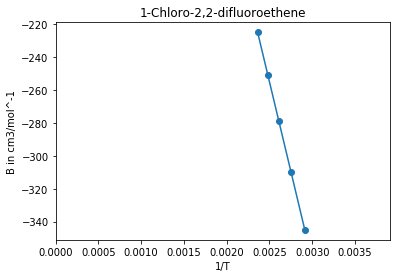

b:[[-452305.0698243]]
a:[868.43567106]


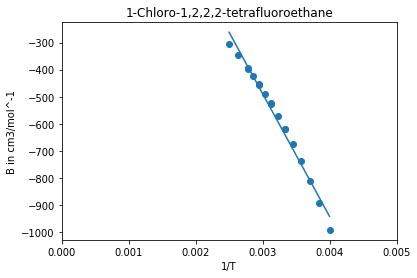

b:[[-716067.10318379]]
a:[1295.42380011]


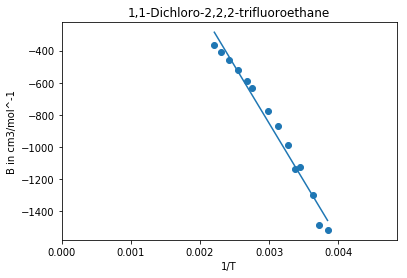

b:[[-879585.09042168]]
a:[1309.36017572]


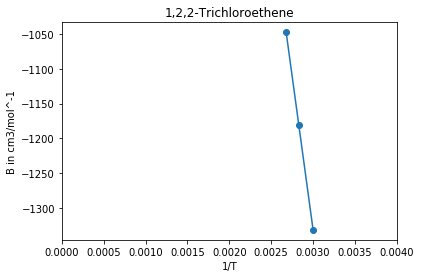

b:[[-244938.05338864]]
a:[444.73253373]


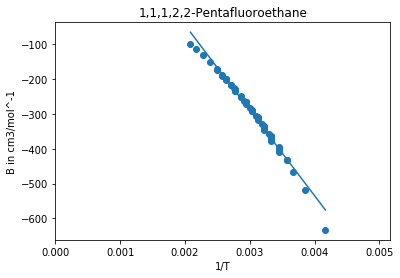

b:[[-322975.75232484]]
a:[604.91698134]


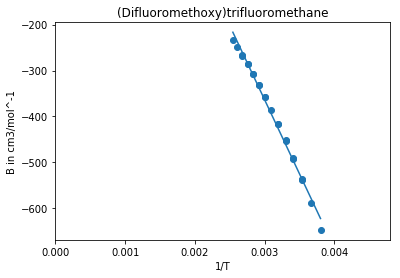

b:[[-248893.26598261]]
a:[685.93309269]


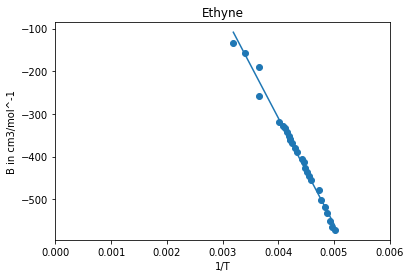

b:[[-702502.22493534]]
a:[1257.08447067]


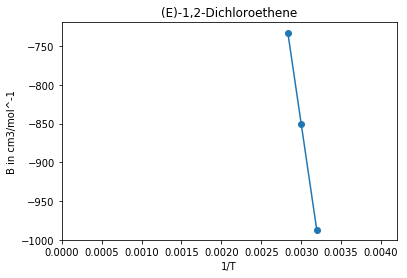

b:[[-613340.8826799]]
a:[920.77705685]


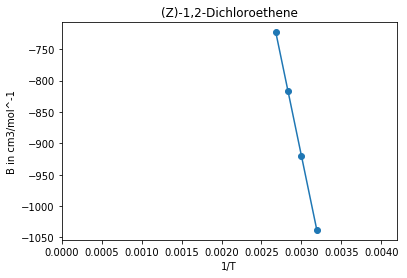

b:[[-116570.30961721]]
a:[196.83519859]


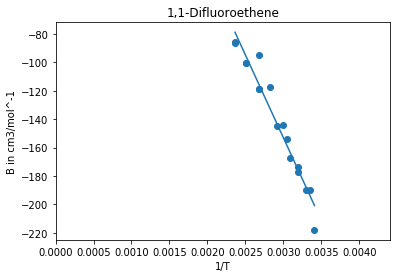

b:[[-347243.05688327]]
a:[651.44567605]


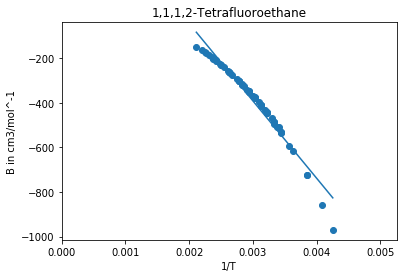

b:[[-374399.71677157]]
a:[779.72452795]


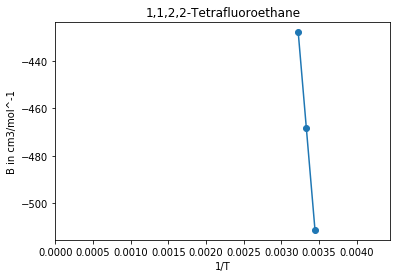

b:[[-338028.79198068]]
a:[453.24878122]


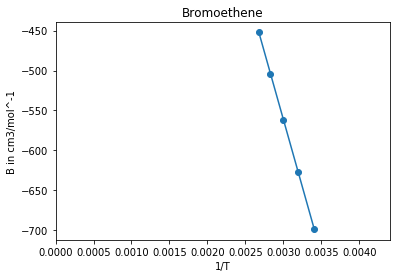

b:[[-177529.22910704]]
a:[165.57198665]


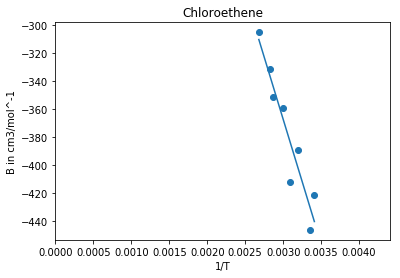

b:[[-421994.54190212]]
a:[752.25241108]


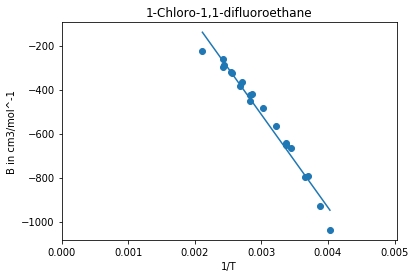

b:[[-674601.12038766]]
a:[1260.76341472]


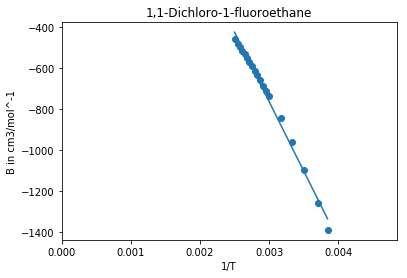

b:[[-592553.80059533]]
a:[629.88526737]


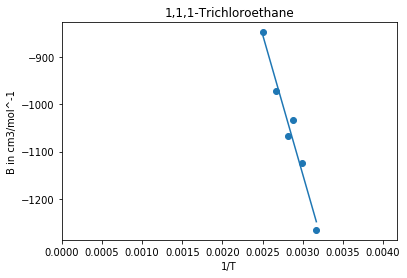

b:[[-220369.09997323]]
a:[455.09818343]


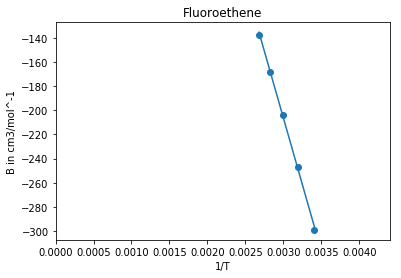

b:[[-286622.90424441]]
a:[542.27994866]


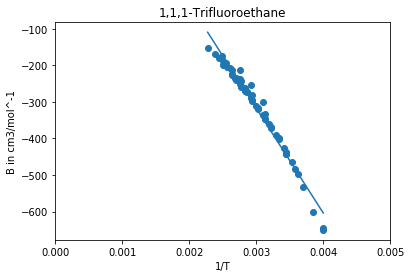

b:[[-578460.]]
a:[1328.3]


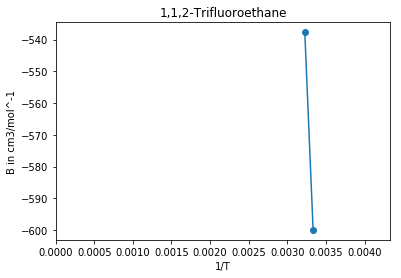

b:[[-933588.42560734]]
a:[1723.58383641]


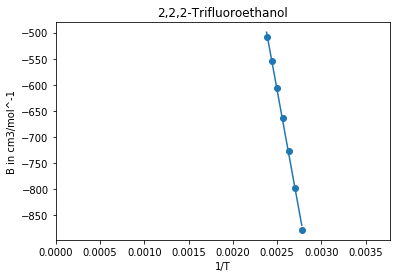

b:[[-508492.12190522]]
a:[649.17263416]


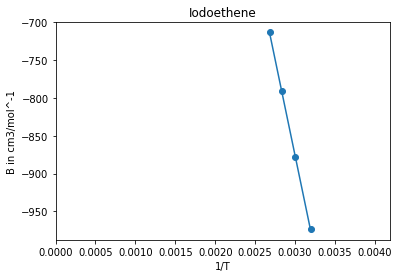

b:[[-2440259.90037214]]
a:[4255.67180112]


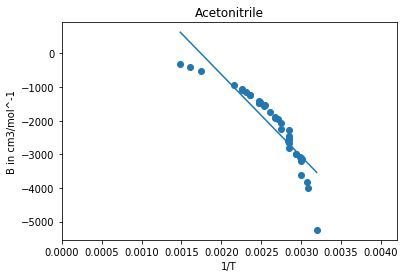

b:[[-89257.08099952]]
a:[156.16297772]


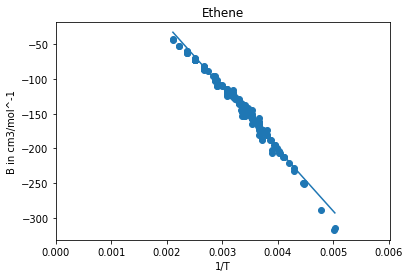

b:[[-600161.95150751]]
a:[901.57964824]


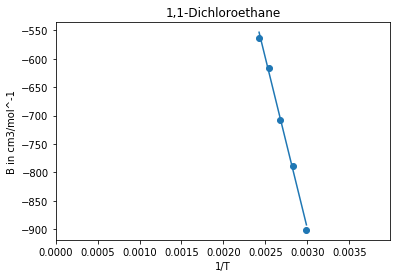

b:[[-539360.33986407]]
a:[672.81512903]


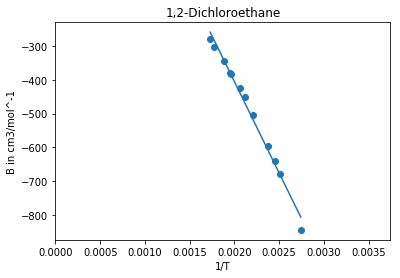

b:[[-386167.28957378]]
a:[743.72381111]


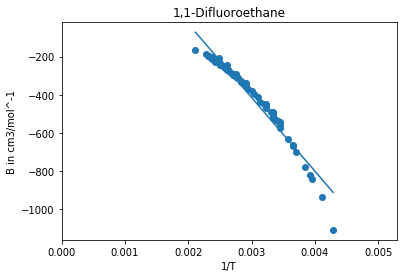

b:[[-847808.88243999]]
a:[1670.70225723]


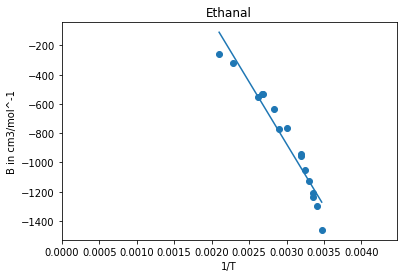

b:[[-362522.33813676]]
a:[612.43519544]


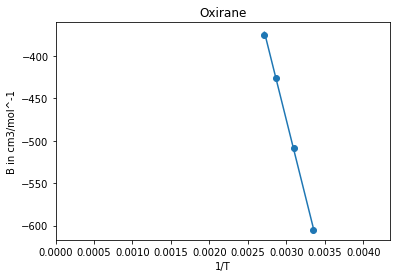

b:[[-8764805.17601437]]
a:[14923.48657781]


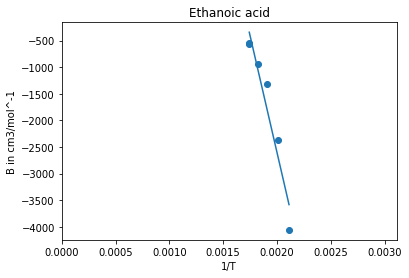

b:[[-675206.51122378]]
a:[1293.26973612]


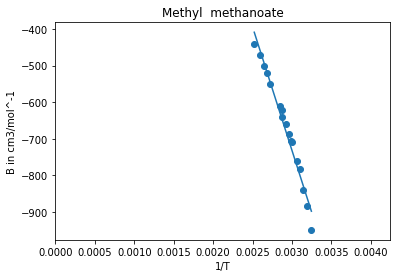

b:[[-782119.65314057]]
a:[1824.7587692]


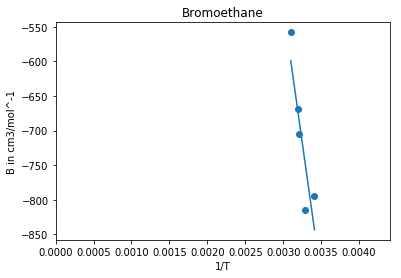

b:[[-424593.55107838]]
a:[677.24488085]


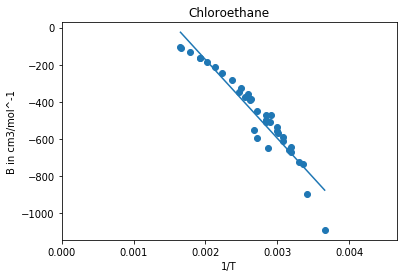

b:[[-271427.43798593]]
a:[534.52906331]


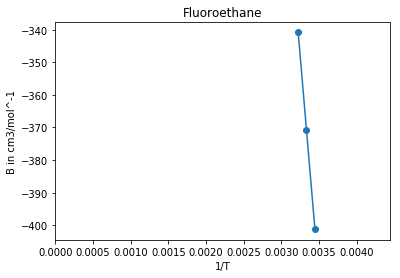

b:[[-116778.59767005]]
a:[195.39496264]


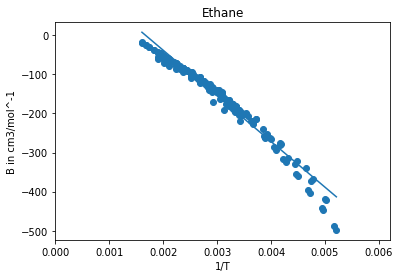

b:[[-303108.54270071]]
a:[518.67404352]


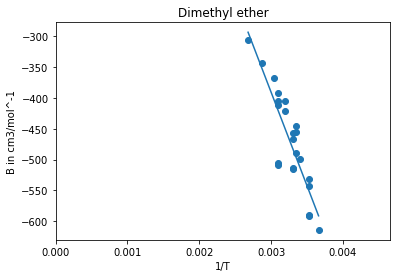

b:[[-1161729.13758481]]
a:[2236.39337057]


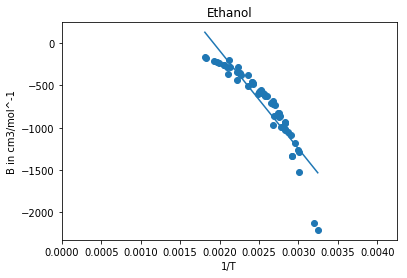

b:[[-741758.86586082]]
a:[1577.01821856]


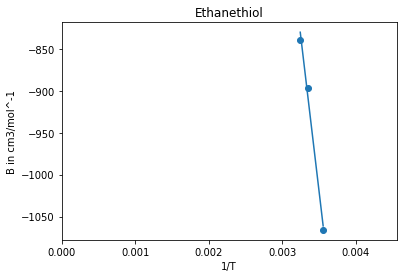

b:[[-641887.2378856]]
a:[1250.11394374]


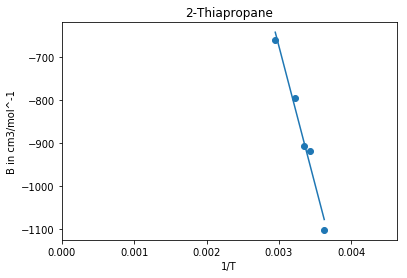

b:[[-933548.68051326]]
a:[1399.56639532]


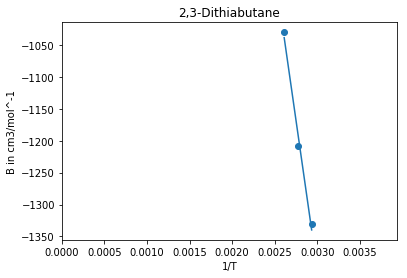

b:[[-491048.61691073]]
a:[876.13074262]


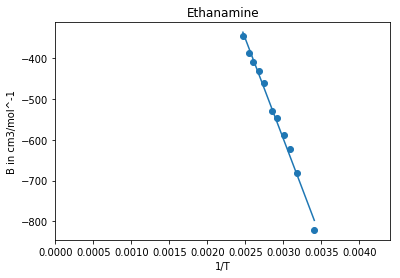

b:[[-388022.41339747]]
a:[651.09266936]


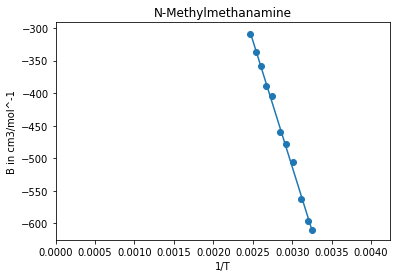

b:[[-236700.9360369]]
a:[417.5160374]


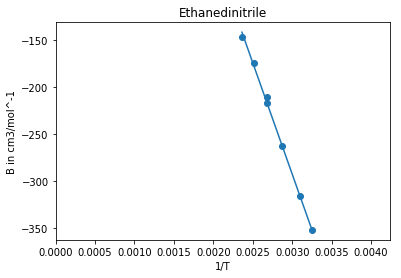

b:[[-2664139.30520852]]
a:[6282.93635525]


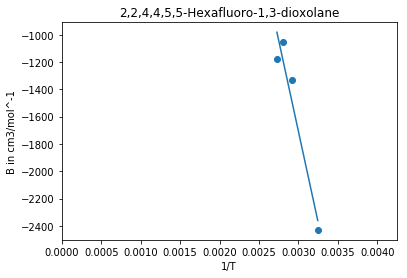

b:[[-462718.16567253]]
a:[969.86726933]


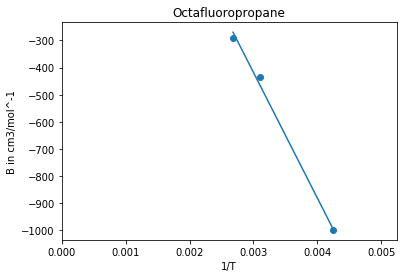

b:[[-9437322.81391076]]
a:[22645.21548539]


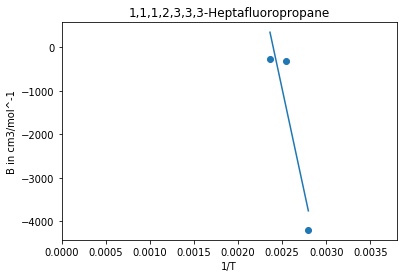

b:[[-386744.92764784]]
a:[581.72831614]


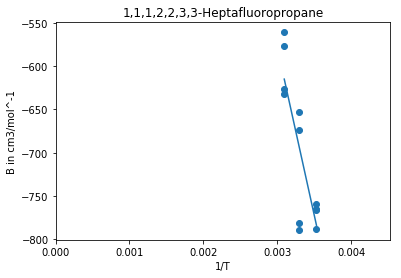

b:[[-532575.01620608]]
a:[984.09394703]


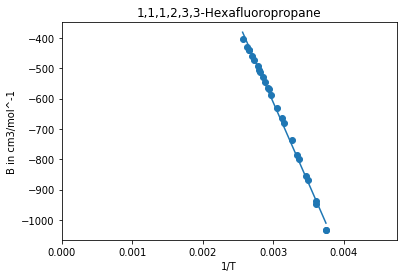

b:[[-529736.41281545]]
a:[892.10614229]


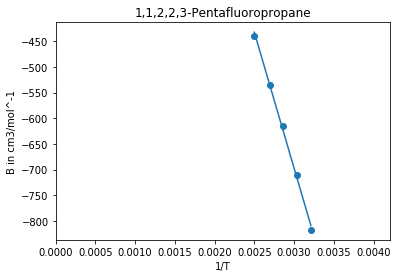

b:[[-187802.74387483]]
a:[259.73345026]


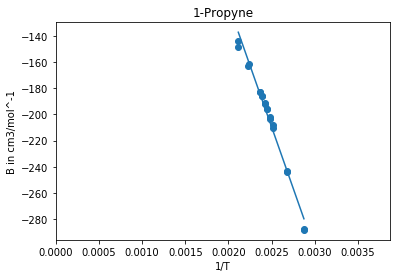

b:[[-262308.03918274]]
a:[491.07059951]


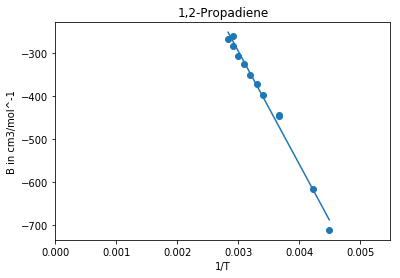

b:[[-246483.02611226]]
a:[-289.907643]


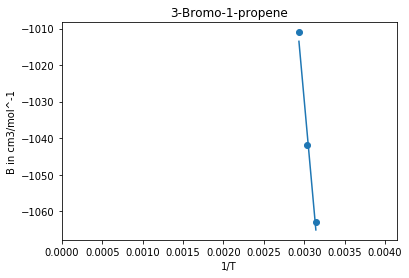

b:[[-205285.11094974]]
a:[312.64175801]


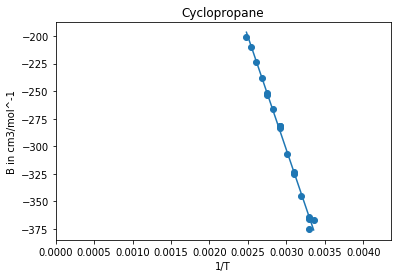

b:[[-199178.60994372]]
a:[313.92496755]


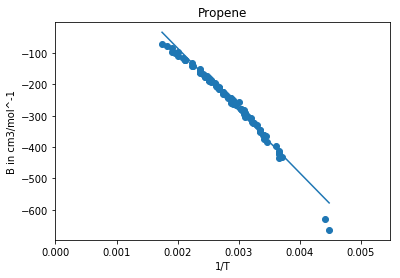

b:[[-858033.39958662]]
a:[1334.08720031]


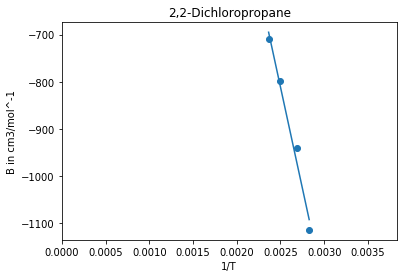

b:[[-918380.81191859]]
a:[2025.71496588]


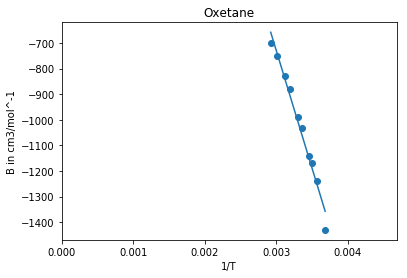

b:[[-1268563.27482468]]
a:[2482.28820611]


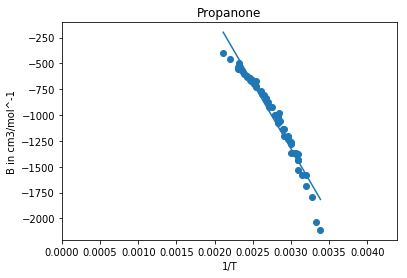

b:[[-2257667.63880773]]
a:[5729.15413426]


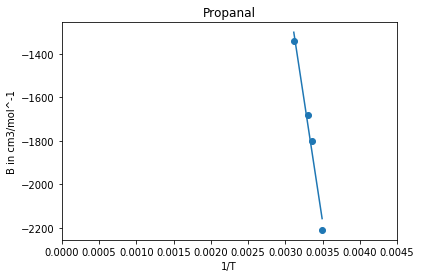

b:[[-887265.71489701]]
a:[1677.21390716]


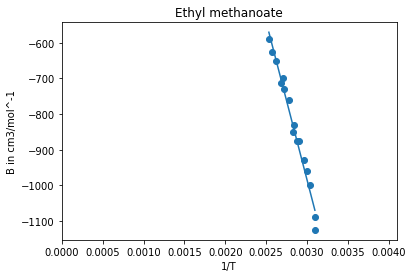

b:[[-995466.4930572]]
a:[1848.57199384]


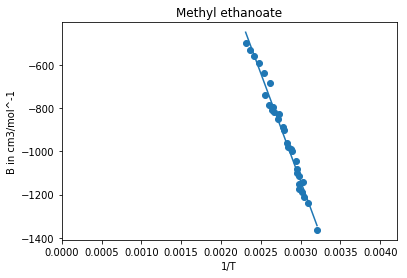

b:[[51470.84372631]]
a:[-960.22938246]


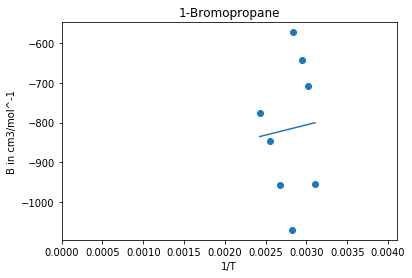

b:[[-765595.25447468]]
a:[1244.47682193]


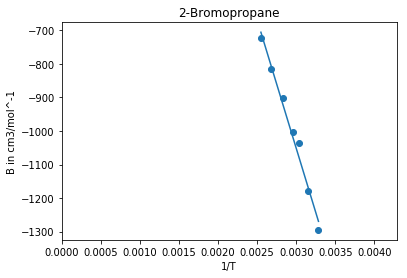

b:[[-529357.62966031]]
a:[779.55924872]


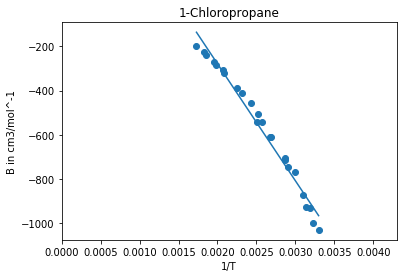

b:[[-515858.46920463]]
a:[783.61271619]


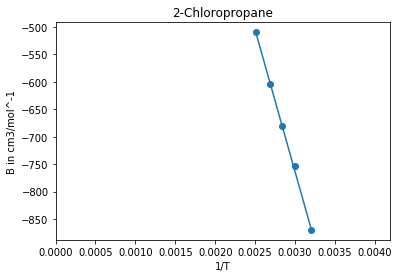

b:[[-221724.73238547]]
a:[340.12874875]


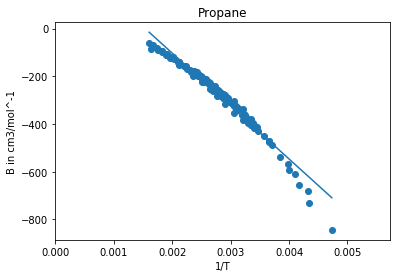

b:[[-407732.98662964]]
a:[773.02715969]


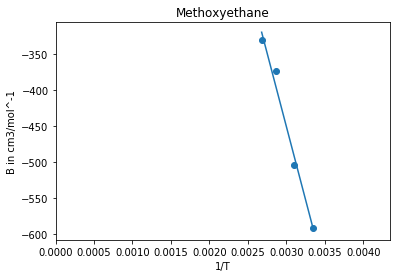

b:[[-1709025.02146895]]
a:[3175.4172282]


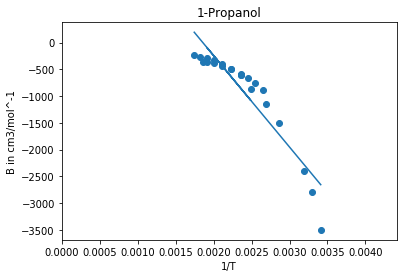

b:[[-1222568.64182497]]
a:[2328.47763858]


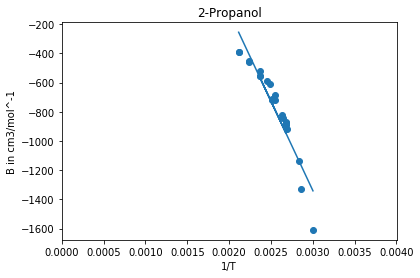

b:[[-1023113.41077066]]
a:[1994.50471172]


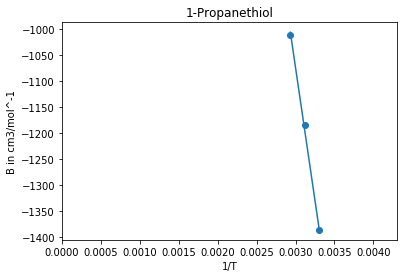

b:[[-901431.40893835]]
a:[1753.47663993]


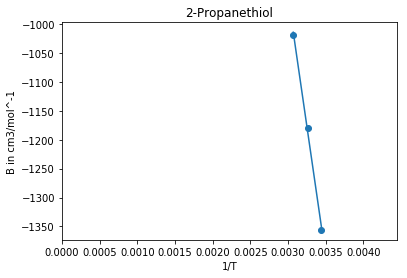

b:[[-977609.40243656]]
a:[1734.50058507]


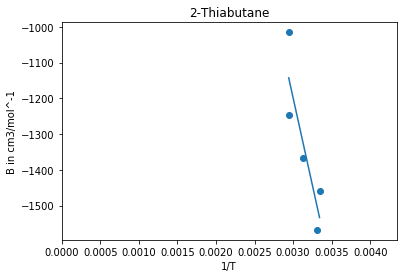

b:[[-463336.03640486]]
a:[810.25155195]


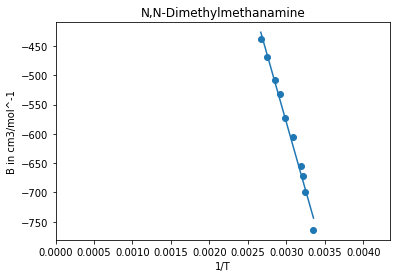

b:[[-2929527.75552667]]
a:[5972.32810658]


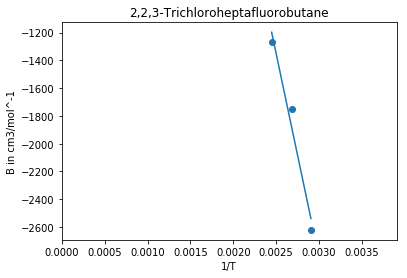

b:[[-3714026.23308214]]
a:[10297.01112375]


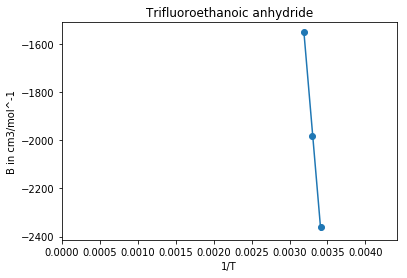

b:[[-394926.37450408]]
a:[596.81362954]


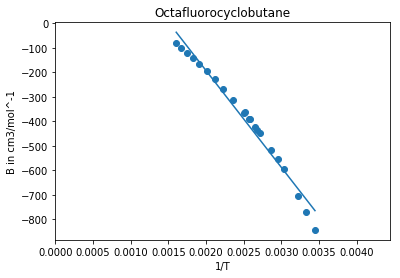

b:[[-140330.53732971]]
a:[-2379.44158871]


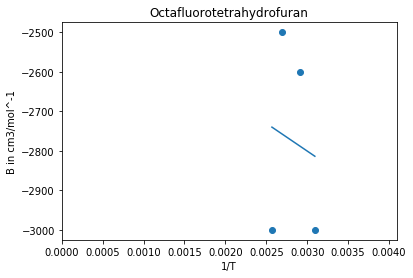

b:[[-622972.58956752]]
a:[1172.1159798]


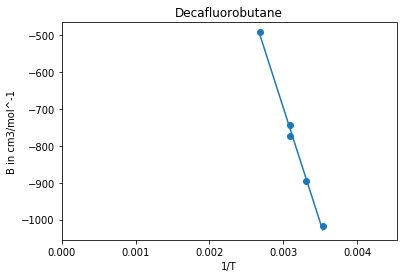

b:[[-1984849.63082255]]
a:[3500.55396811]


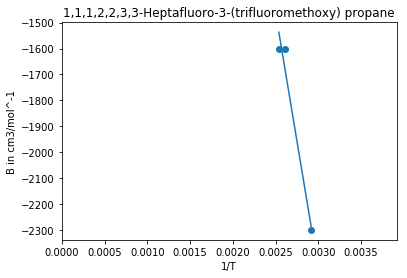

b:[[-725201.20848978]]
a:[1273.13515408]


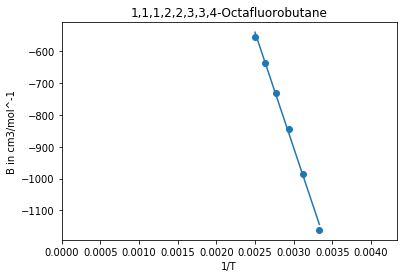

b:[[-1272895.47035717]]
a:[1767.12649015]


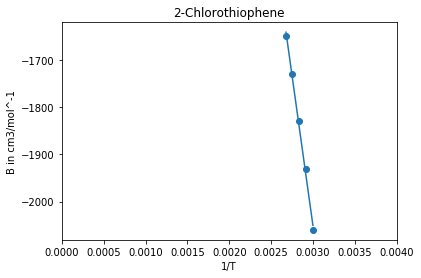

b:[[-510027.28414369]]
a:[874.77351013]


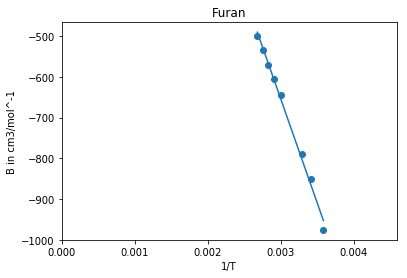

b:[[-707042.45473492]]
a:[1071.82021112]


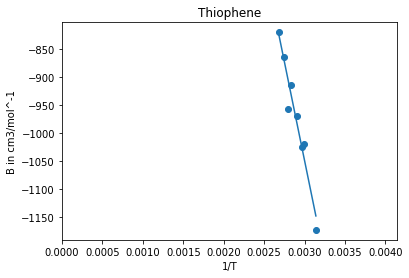

b:[[-4127.46956095]]
a:[-1209.88101756]


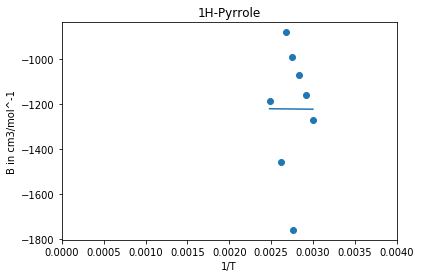

b:[[-485086.09297558]]
a:[974.25608965]


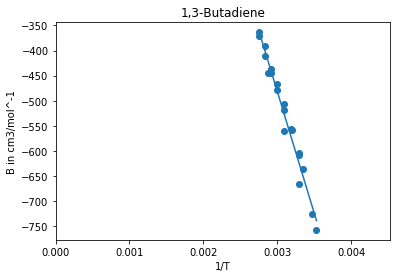

b:[[-571034.04863289]]
a:[1108.93071304]


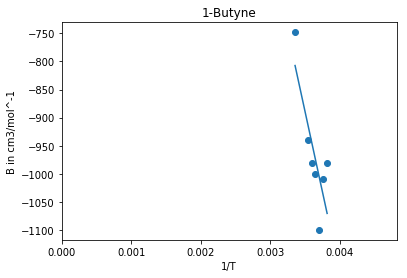

b:[[-445033.28024467]]
a:[612.70963027]


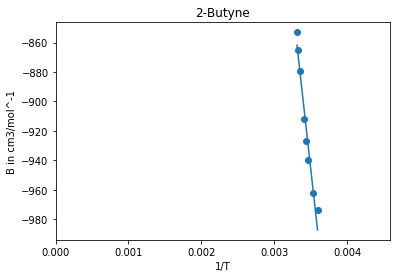

b:[[-417784.27433875]]
a:[584.91553606]


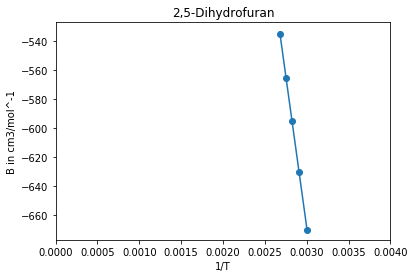

b:[[-4318294.28977463]]
a:[9541.89229255]


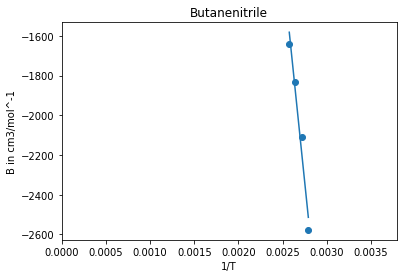

b:[[-2190966.98576077]]
a:[3981.82089551]


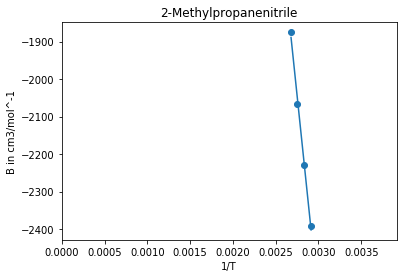

b:[[-552249.54317374]]
a:[1080.16955601]


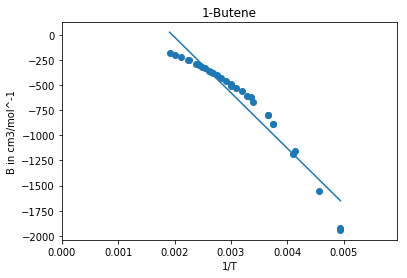

b:[[-589115.77104134]]
a:[1232.58498894]


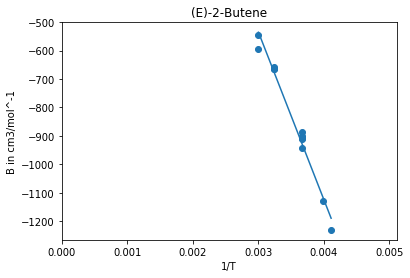

b:[[-636499.3862404]]
a:[1381.17968058]


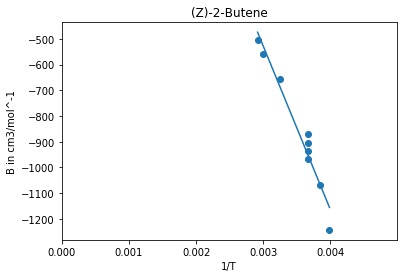

b:[[-413590.63866289]]
a:[649.40230078]


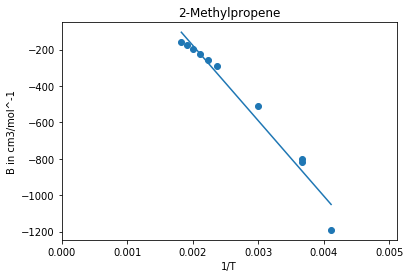

b:[[-968455.81737755]]
a:[1679.16456234]


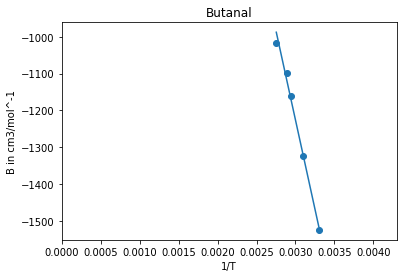

b:[[-1694830.14589504]]
a:[3393.80288284]


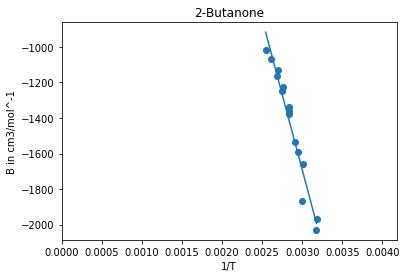

b:[[-790216.01981771]]
a:[1391.72268193]


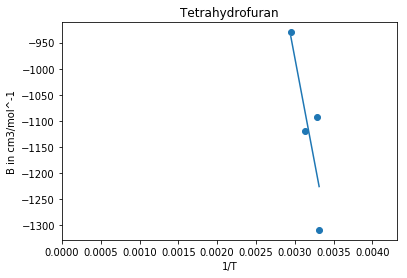

b:[[-861074.86246904]]
a:[1244.49804532]


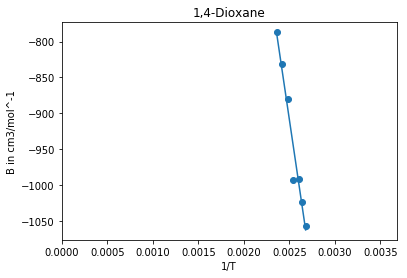

b:[[-1279198.1998972]]
a:[2380.22521307]


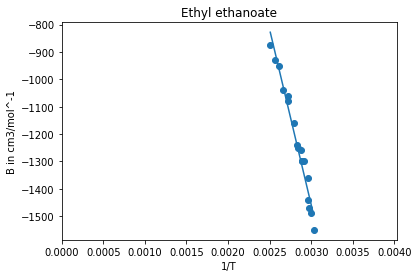

b:[[-1301203.30749609]]
a:[2382.73260981]


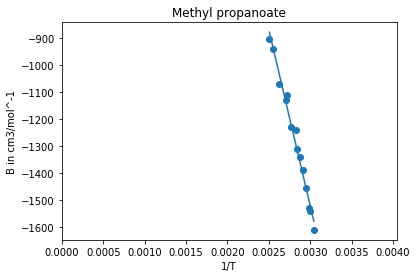

b:[[-1291602.38688582]]
a:[2436.86763067]


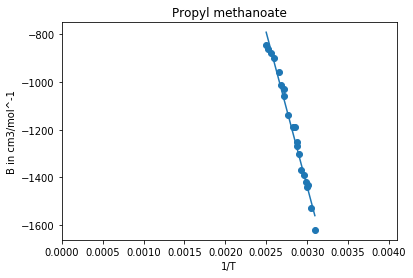

b:[[-19053.05844916]]
a:[-933.22298987]


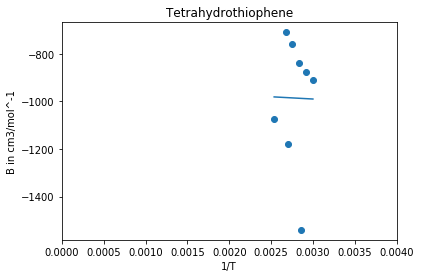

b:[[-2846600.57951463]]
a:[6234.22644654]


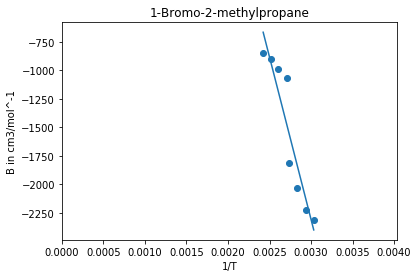

b:[[-2668425.0424966]]
a:[6339.62039823]


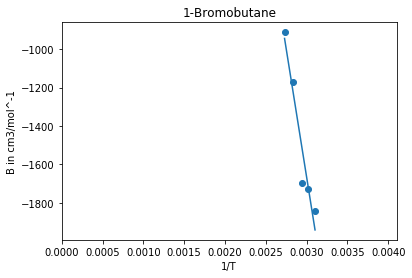

b:[[-874575.55685312]]
a:[1214.39941156]


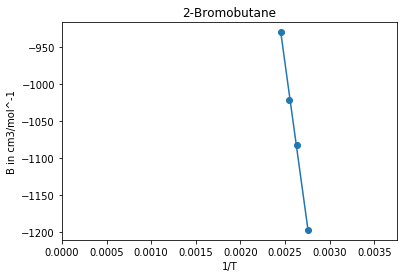

b:[[-710778.72814528]]
a:[994.38825604]


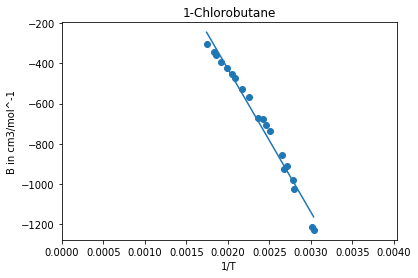

b:[[-351282.51444]]
a:[-12.3024]


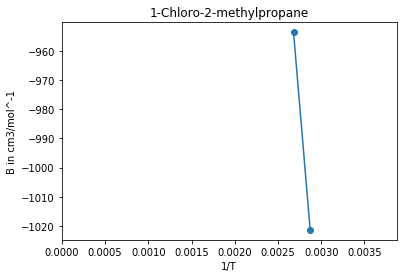

b:[[-971454.05219709]]
a:[1828.22830467]


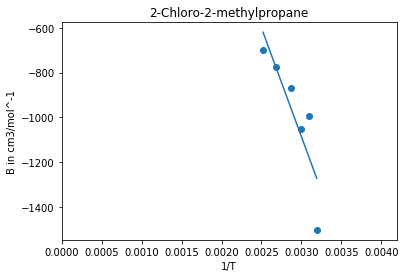

b:[[-1217917.61603489]]
a:[2392.21729915]


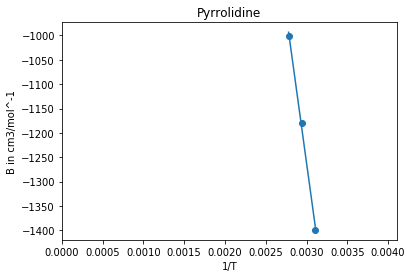

b:[[-393725.6416911]]
a:[588.56905887]


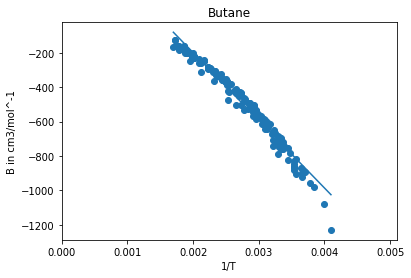

b:[[-341862.59971345]]
a:[496.14317297]


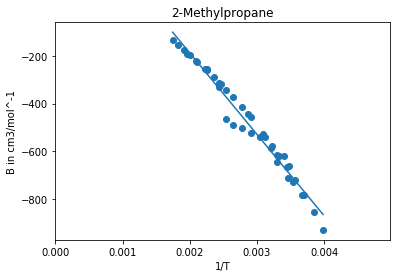

b:[[-1415883.89161673]]
a:[2475.52871279]


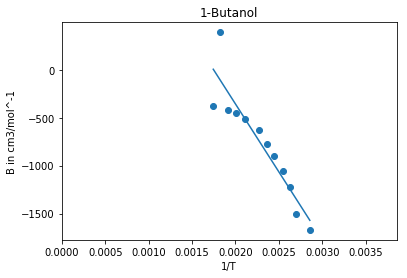

b:[[-1423633.61750644]]
a:[2822.85793373]


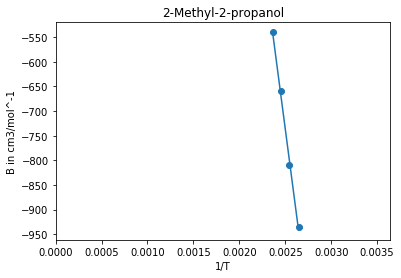

b:[[-844320.48071712]]
a:[1637.02345025]


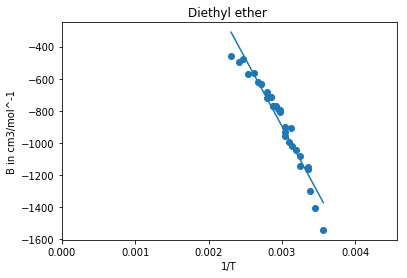

b:[[-1510200.30049163]]
a:[2796.1258812]


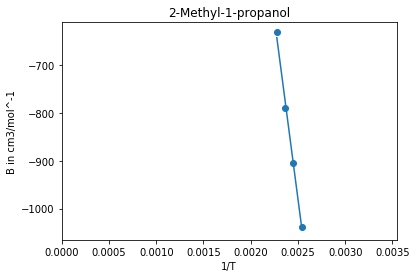

b:[[-1553078.64752607]]
a:[2976.972681]


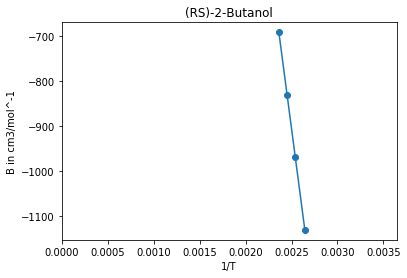

b:[[-1114531.70878646]]
a:[1756.05978819]


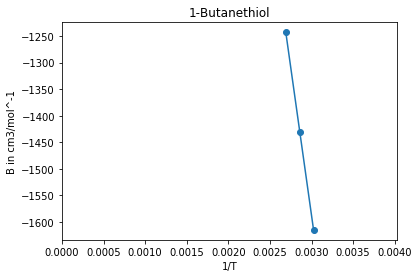

b:[[-1100449.78818774]]
a:[2119.41791738]


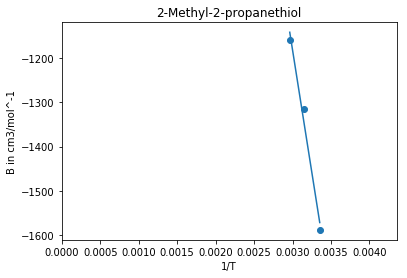

b:[[-1256231.16325049]]
a:[2240.66346017]


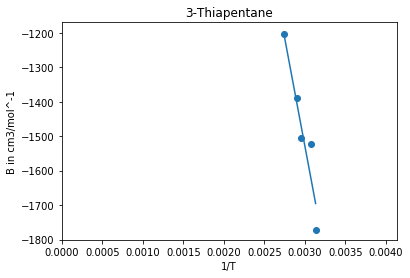

b:[[-1540588.98736218]]
a:[3095.93766103]


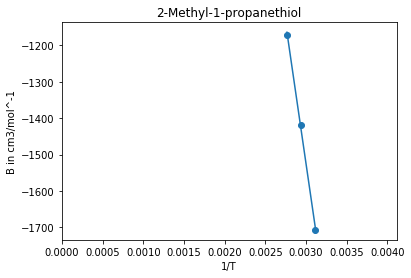

b:[[-959144.60401138]]
a:[1453.84481293]


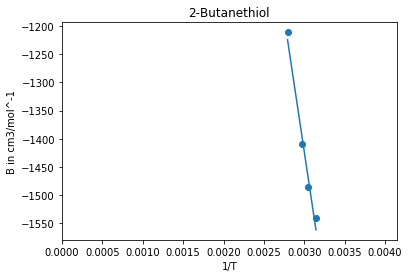

b:[[-1146304.32017124]]
a:[2032.57864562]


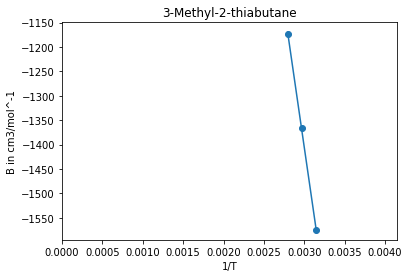

b:[[-1281960.4656804]]
a:[2243.38624078]


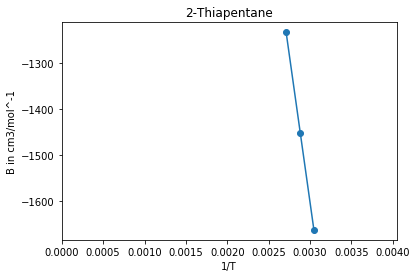

b:[[-1879.01373196]]
a:[-1835.99963681]


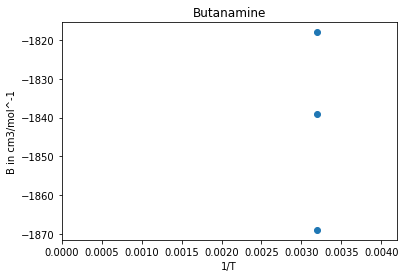

b:[[-899381.29860137]]
a:[1561.36230585]


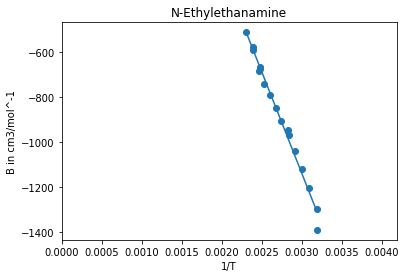

b:[[-635140.6424549]]
a:[998.99942582]


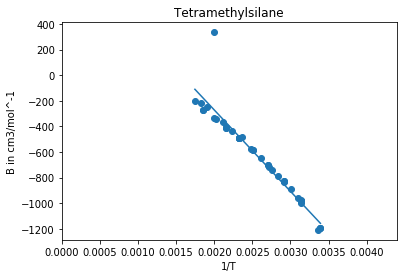

b:[[-972364.3404968]]
a:[1821.87738379]


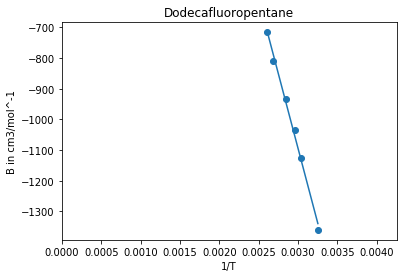

b:[[-1035089.97179975]]
a:[1691.88028916]


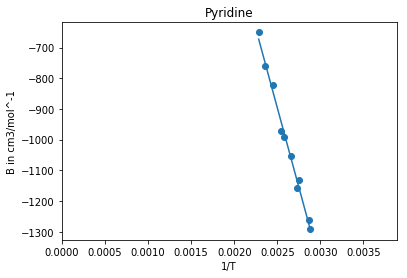

b:[[-437679.01385595]]
a:[509.29317554]


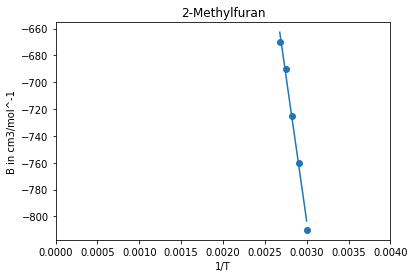

b:[[-1245818.99685905]]
a:[2030.39727939]


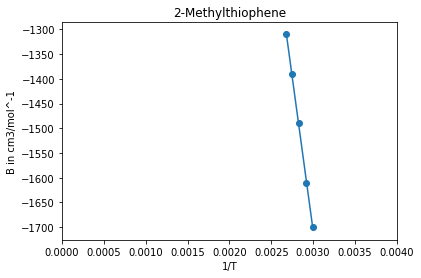

b:[[-1583660.15015699]]
a:[2925.77029383]


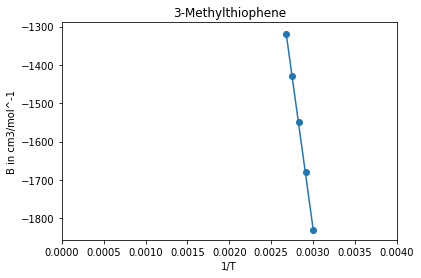

b:[[-901145.82480526]]
a:[1367.66371539]


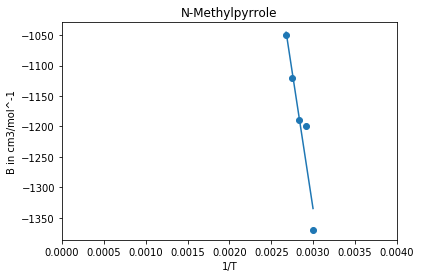

b:[[-587027.35872888]]
a:[947.51596453]


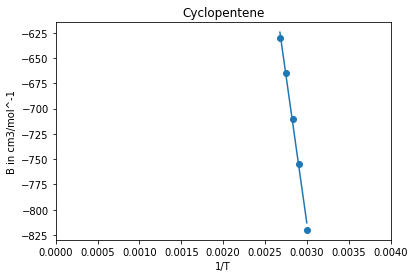

b:[[-1142119.16077918]]
a:[2115.81938482]


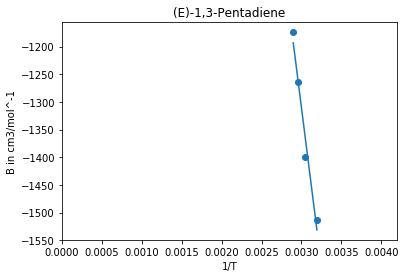

b:[[-809761.28840116]]
a:[1226.07707555]


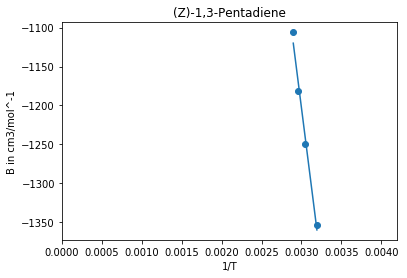

b:[[-840173.51768776]]
a:[1758.2169348]


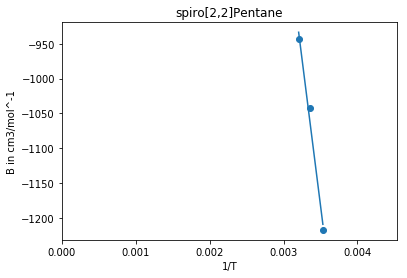

b:[[-634895.80823589]]
a:[1067.17722749]


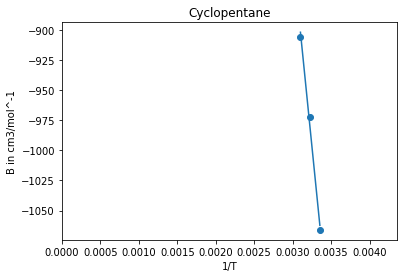

b:[[-435788.00172537]]
a:[307.80173694]


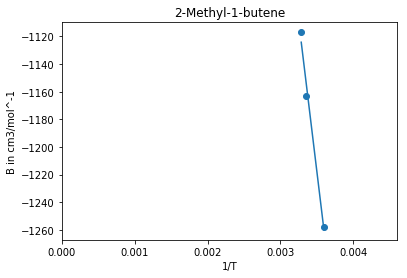

b:[[-918353.79853924]]
a:[1803.29703193]


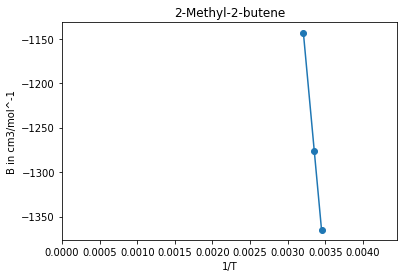

b:[[-695885.14090897]]
a:[1236.34740387]


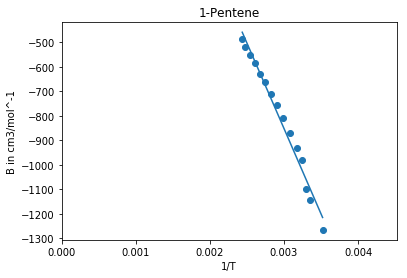

b:[[-2646642.50358158]]
a:[5536.95321433]


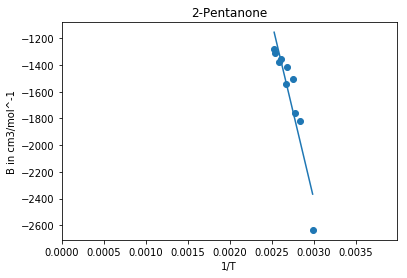

b:[[-2082613.00496488]]
a:[4044.30897579]


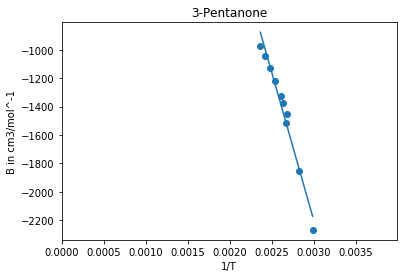

b:[[-1972374.65244314]]
a:[3971.06883471]


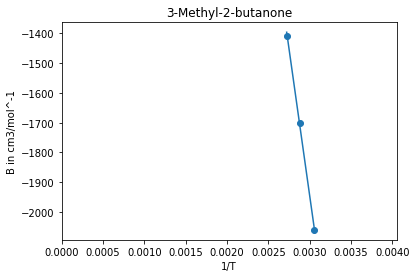

b:[[-1777198.5198]]
a:[3366.692]


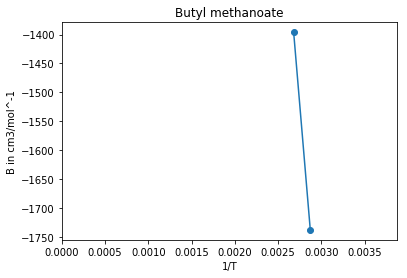

b:[[-2296232.72176772]]
a:[5046.72850512]


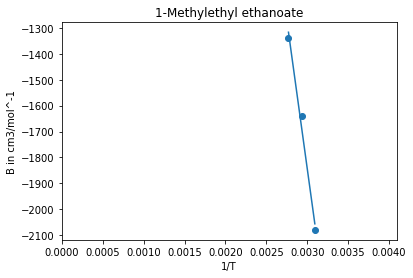

b:[[-2311610.670909]]
a:[4785.18711492]


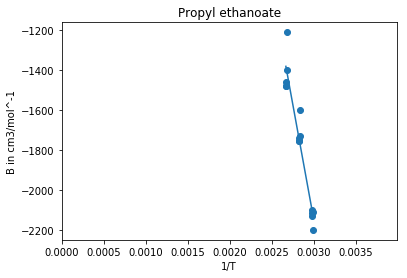

b:[[-1510926.10789737]]
a:[2517.01730689]


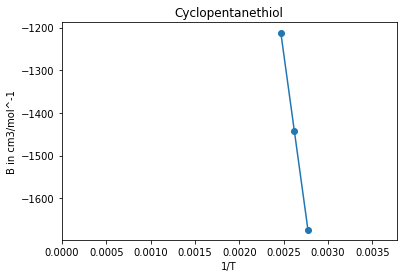

b:[[-936995.95132273]]
a:[952.56558784]


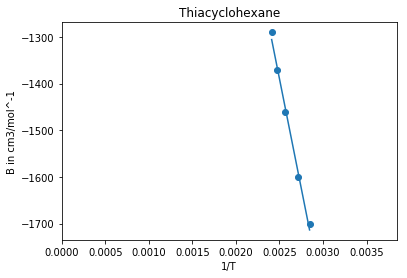

b:[[-999070.08790704]]
a:[1497.40008856]


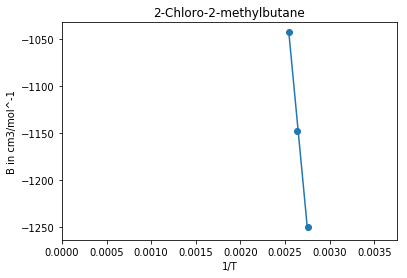

b:[[-939447.67585207]]
a:[1387.15109219]


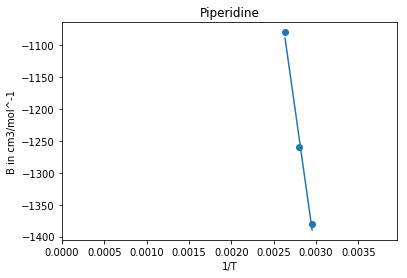

b:[[-444819.23294156]]
a:[638.87128377]


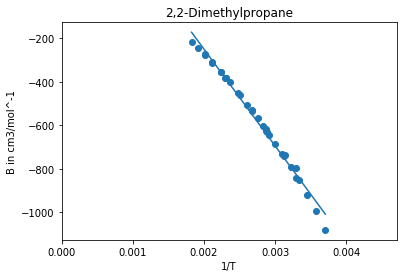

b:[[-580726.30871751]]
a:[851.30727178]


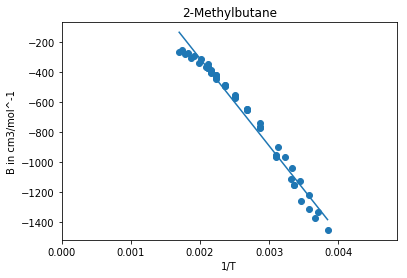

b:[[-598911.63297241]]
a:[865.22383274]


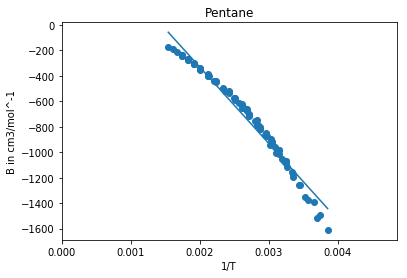

b:[[-3116033.87669164]]
a:[6562.70629418]


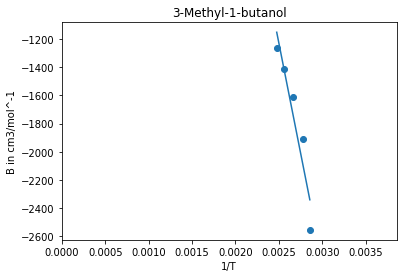

b:[[-1374994.3201815]]
a:[2510.74438156]


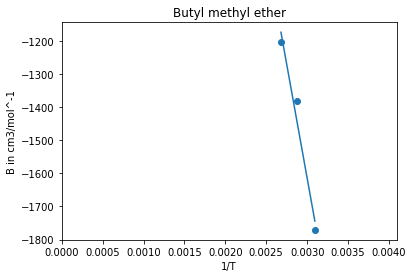

b:[[-893951.67631697]]
a:[1426.35406905]


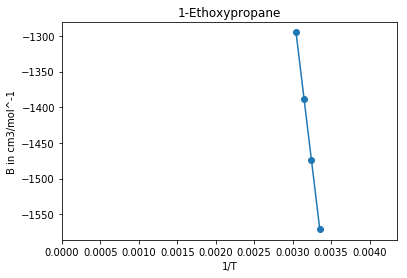

b:[[-1641345.81266431]]
a:[2696.39941853]


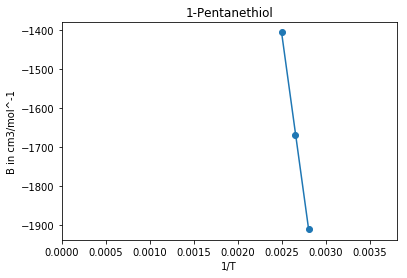

b:[[-1201341.88579029]]
a:[1932.07697644]


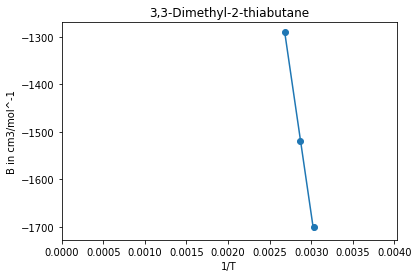

b:[[-1291369.92023395]]
a:[2208.57573782]


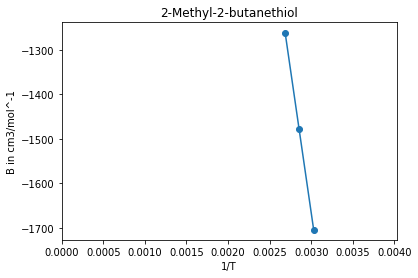

b:[[-1681156.85533582]]
a:[2940.74622054]


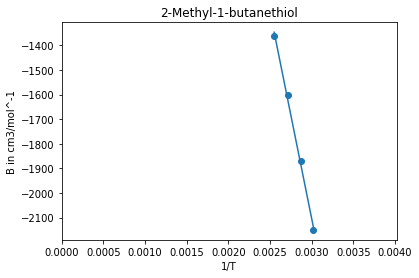

b:[[0.]]
a:[-1054.]


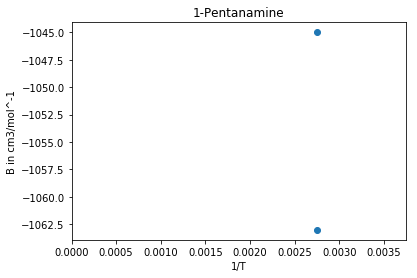

b:[[-2679841.59517977]]
a:[5092.6270753]


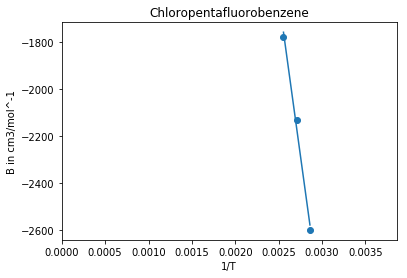

b:[[-1179499.3715408]]
a:[1789.20487585]


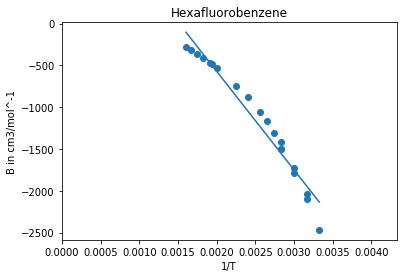

b:[[-860985.06132539]]
a:[1320.57776903]


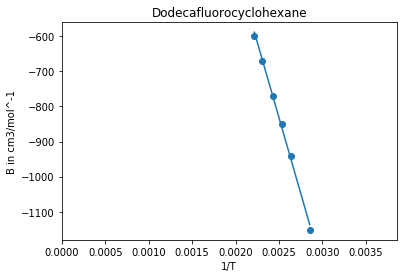

b:[[-1491033.23433972]]
a:[2748.07654516]


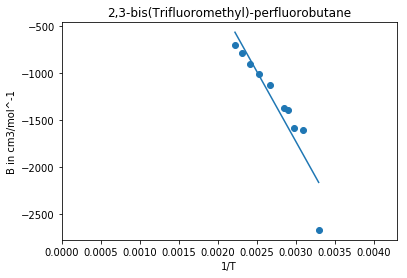

b:[[-1360556.91206449]]
a:[2389.10370655]


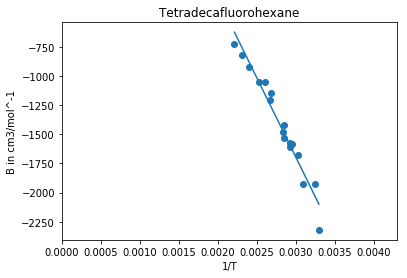

b:[[-1315209.61426304]]
a:[2261.72417335]


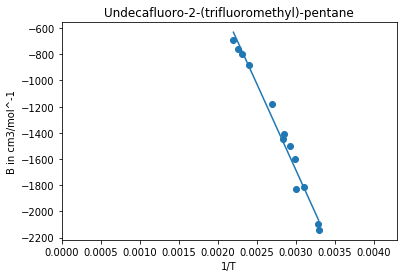

b:[[-1122513.93283056]]
a:[1806.70493577]


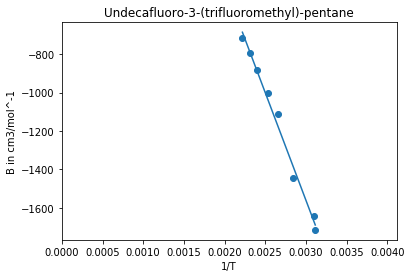

b:[[-2084786.25716288]]
a:[4366.02335101]


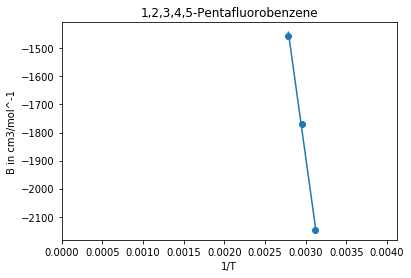

b:[[-1311694.51152455]]
a:[2382.41524079]


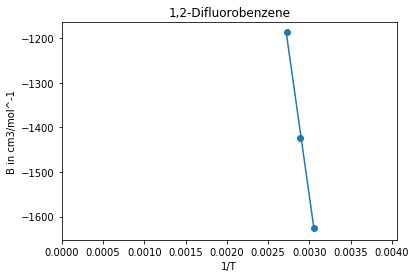

b:[[-836061.03740323]]
a:[954.17771857]


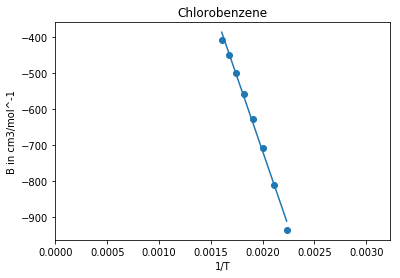

b:[[-707052.49997206]]
a:[916.14889403]


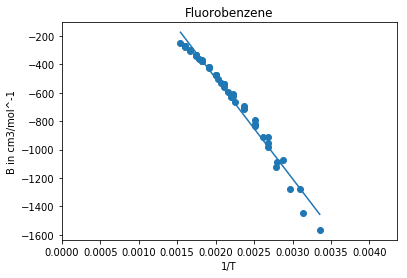

b:[[-687410.10784098]]
a:[943.91477592]


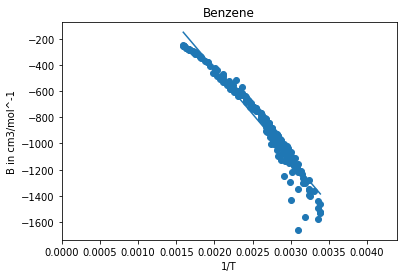

b:[[-1333462.36365639]]
a:[1718.73889401]


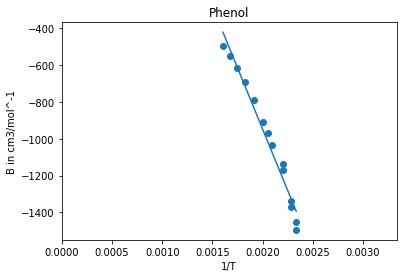

b:[[-1843069.327216]]
a:[2795.57910128]


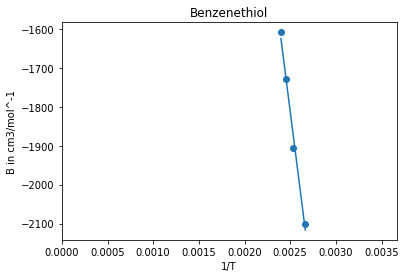

b:[[-1496384.15989553]]
a:[2519.54031176]


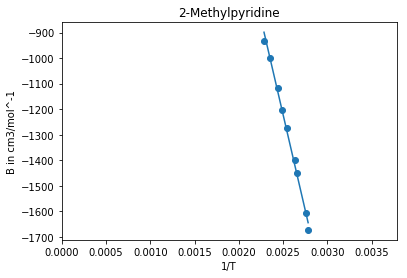

b:[[-1737228.20195591]]
a:[2850.02933774]


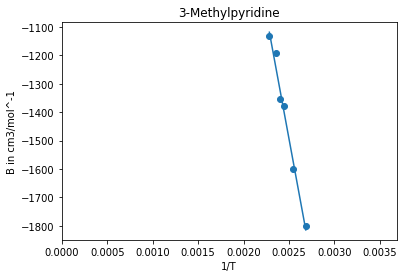

b:[[-1840834.40009864]]
a:[3108.09846952]


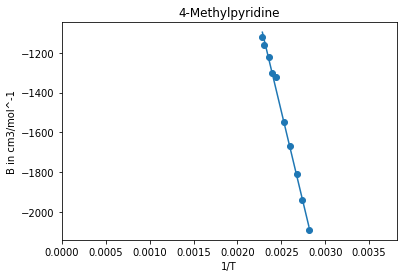

b:[[-1272954.63922738]]
a:[1621.29416267]


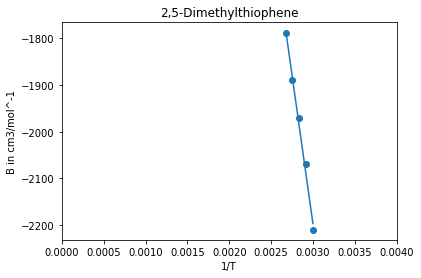

b:[[-743378.04181455]]
a:[1044.12991883]


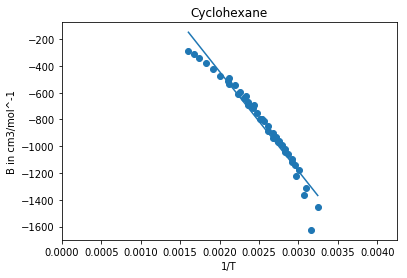

b:[[-967572.99925371]]
a:[1627.55821639]


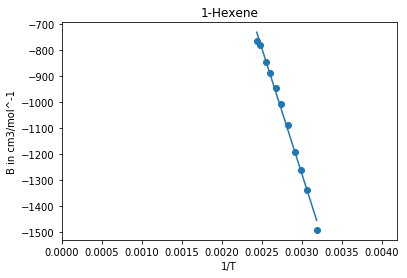

b:[[-1494377.2272196]]
a:[2978.92632894]


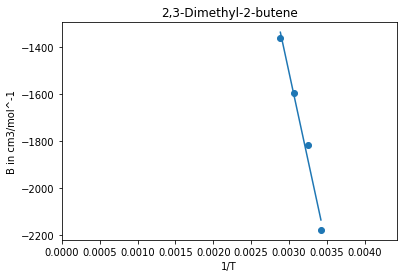

b:[[-867672.608042]]
a:[1397.76298875]


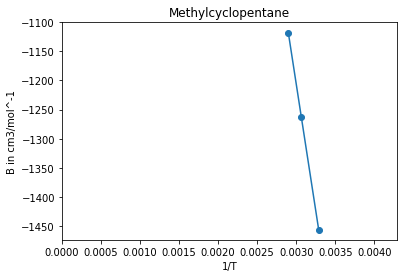

b:[[-2235912.60184202]]
a:[4359.79313842]


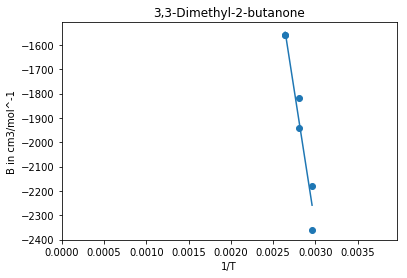

b:[[-2516171.67744023]]
a:[4693.74572556]


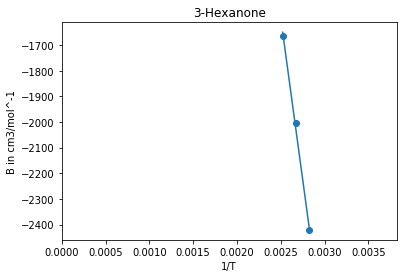

b:[[-2437355.82628702]]
a:[4522.45880611]


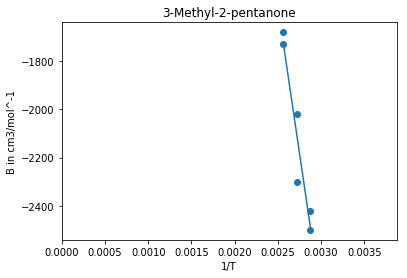

b:[[-2778326.00289609]]
a:[5287.47923608]


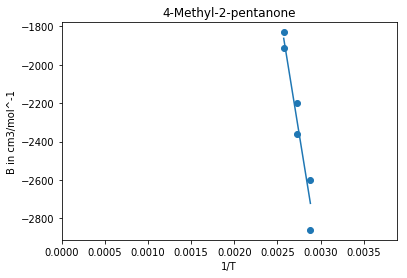

b:[[-2074167.75312017]]
a:[3466.55710042]


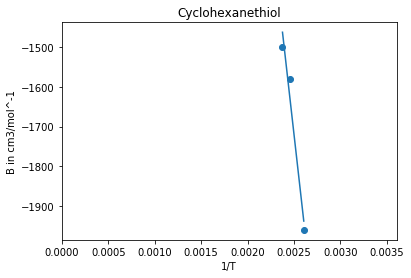

b:[[-558835.34030948]]
a:[702.38291149]


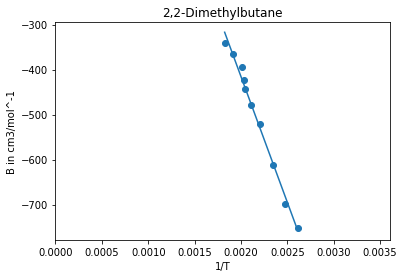

b:[[-782367.01593461]]
a:[1089.70575515]


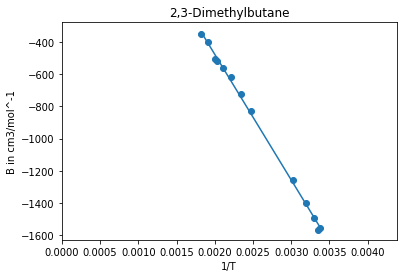

b:[[-925632.70920388]]
a:[1422.62246309]


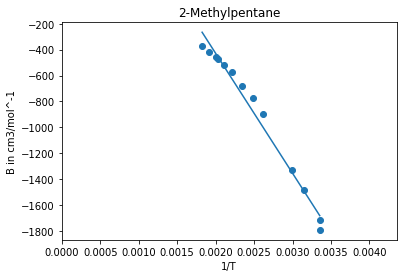

b:[[-901161.95773085]]
a:[1374.09155943]


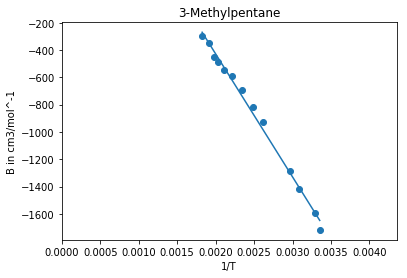

b:[[-906234.62689395]]
a:[1330.45523743]


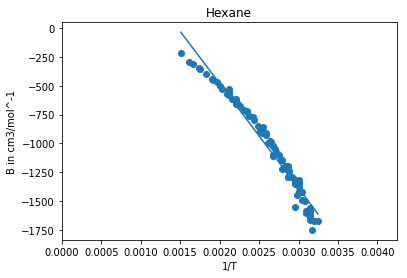

b:[[-1237341.34172444]]
a:[2198.5413659]


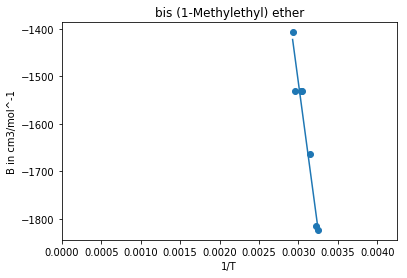

b:[[-669319.25947631]]
a:[626.21628645]


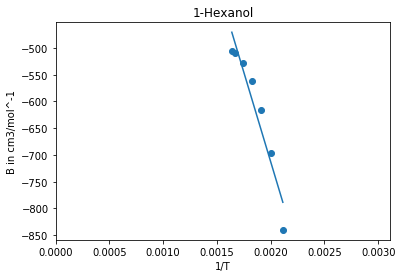

b:[[-768432.89447361]]
a:[528.2819296]


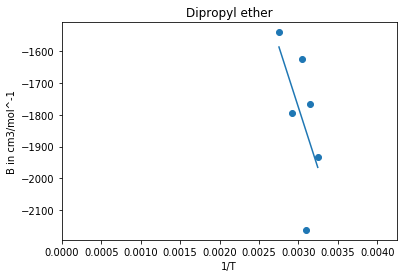

b:[[-6569427.44456181]]
a:[17607.13280199]


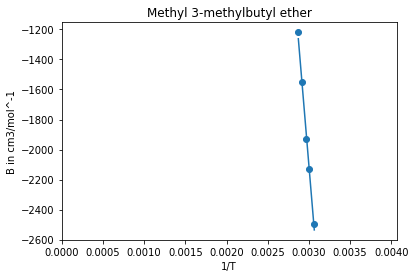

b:[[-1330300.6464]]
a:[2070.056]


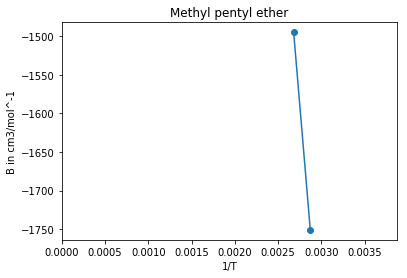

b:[[-1154500.1238875]]
a:[1845.85091999]


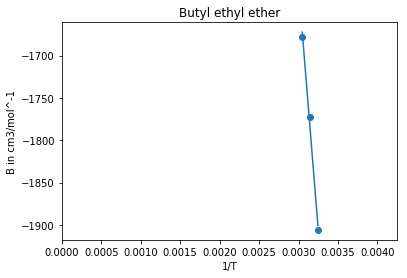

b:[[-1104352.50803396]]
a:[1795.87714084]


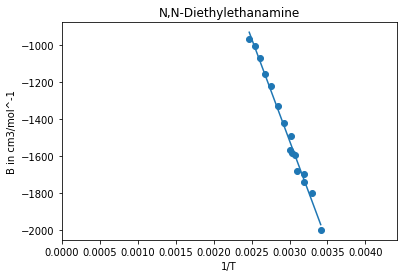

b:[[-1485018.23109085]]
a:[2053.39404688]


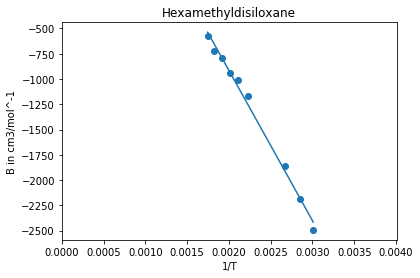

b:[[-1762030.66909927]]
a:[3421.83125812]


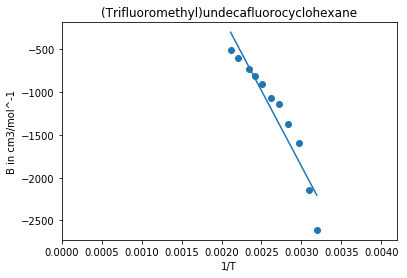

b:[[-2272103.10641494]]
a:[4102.10715517]


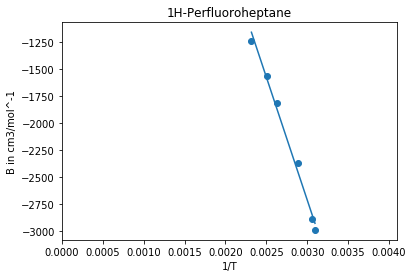

b:[[-2817046.299619]]
a:[5332.65915181]


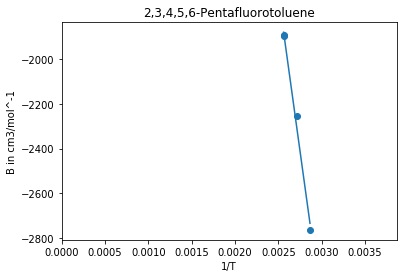

b:[[-1560780.24350586]]
a:[2700.8799583]


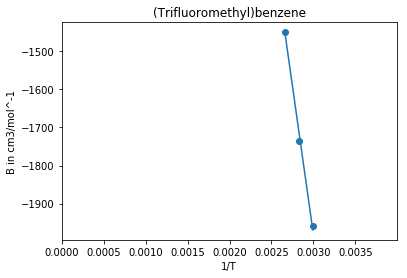

b:[[-17889828.99909914]]
a:[30672.25908638]


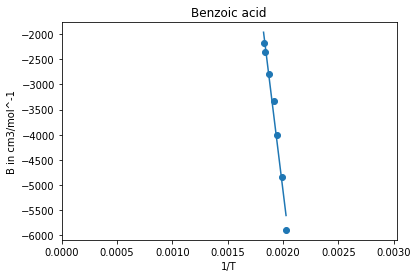

b:[[-1294326.46584641]]
a:[2007.82878153]


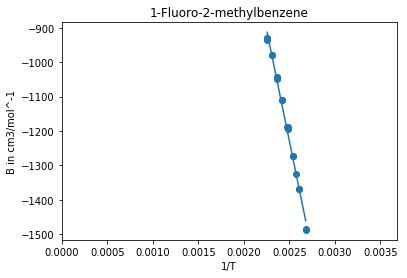

b:[[-1345949.29238559]]
a:[2056.40964985]


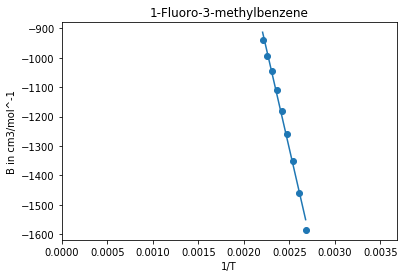

b:[[-1232488.90194942]]
a:[1794.93054733]


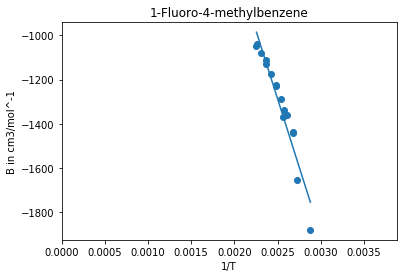

b:[[-1042850.2506763]]
a:[1447.3632825]


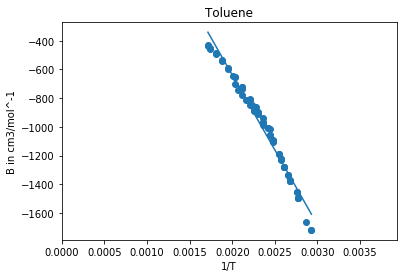

b:[[-4621167.06761007]]
a:[8808.63522013]


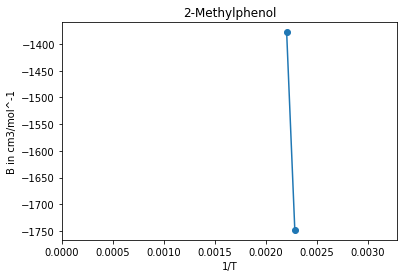

b:[[-1626442.5635527]]
a:[2337.92194284]


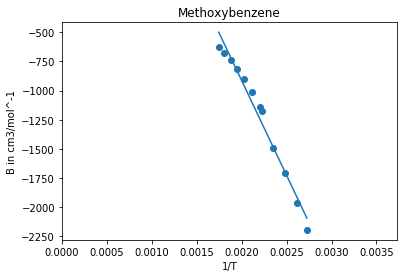

b:[[-1953165.14660605]]
a:[2944.9383873]


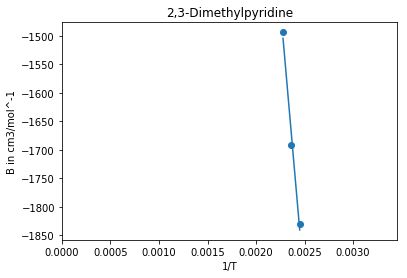

b:[[-1643756.51142426]]
a:[2261.10623347]


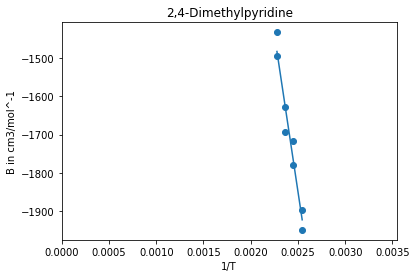

b:[[-1755272.56029517]]
a:[2531.1644011]


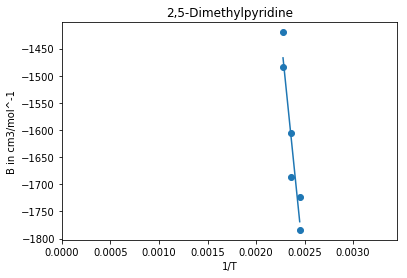

b:[[-1683885.52766105]]
a:[2584.55165863]


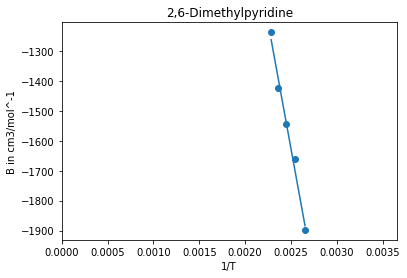

b:[[-4065742.57643312]]
a:[7518.37261146]


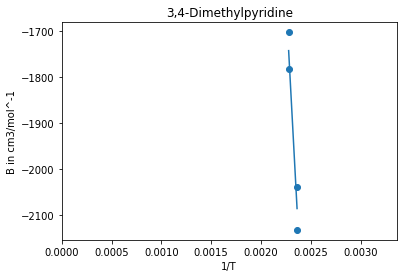

b:[[-2745617.1392405]]
a:[4537.75316456]


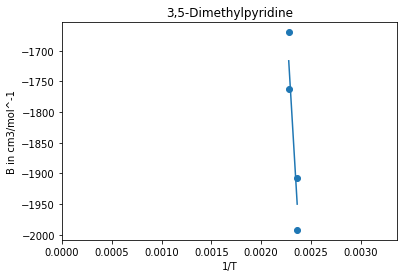

b:[[-1428897.32051597]]
a:[2425.36596456]


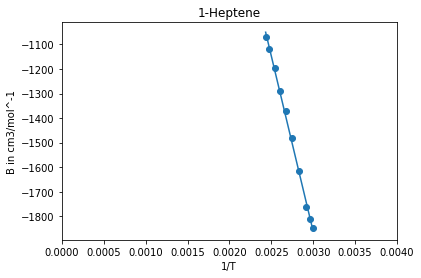

b:[[-1484238.94437374]]
a:[2803.88183402]


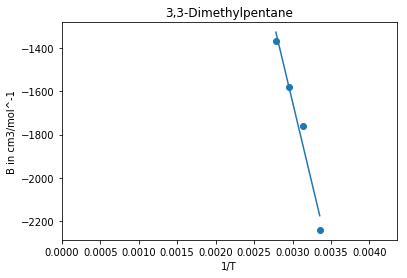

b:[[-1057314.24550106]]
a:[1376.74185667]


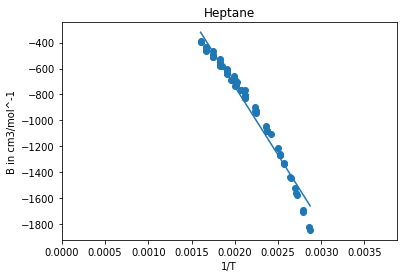

b:[[-2449424.07893105]]
a:[4347.00911729]


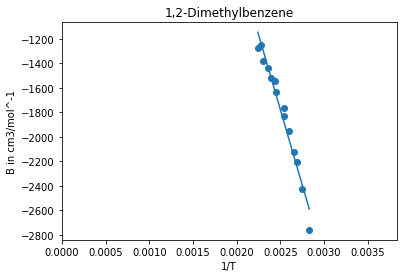

b:[[-2583532.20919325]]
a:[4737.80755297]


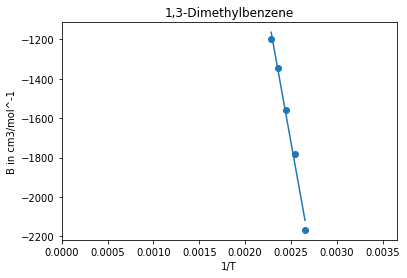

b:[[-1665674.66594847]]
a:[2468.55759625]


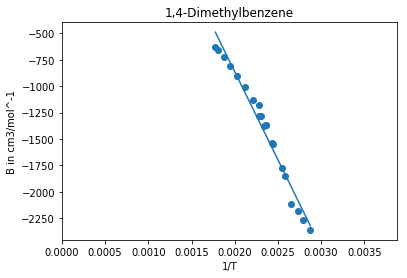

b:[[-1947079.31443324]]
a:[3323.6600533]


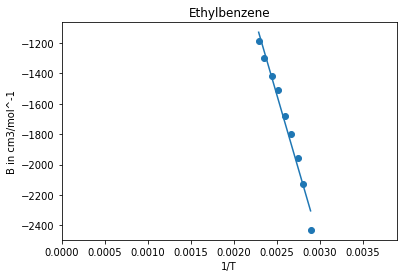

b:[[-1934098.2062822]]
a:[3231.45477725]


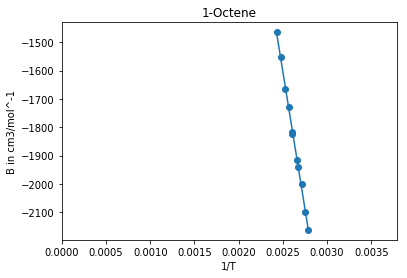

b:[[-1372906.98745249]]
a:[2059.35973506]


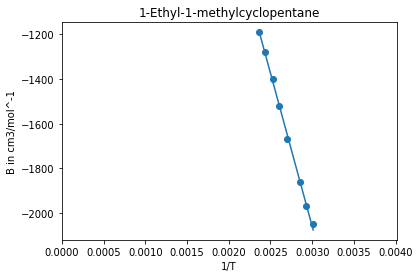

b:[[-1527387.35927282]]
a:[2407.12359511]


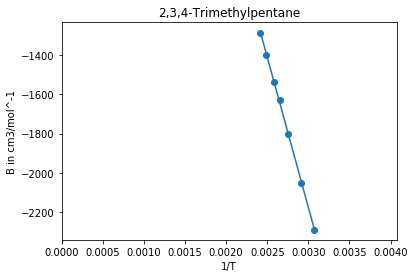

b:[[-1571533.13542612]]
a:[2164.65727607]


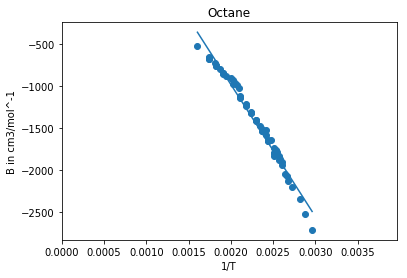

b:[[0.]]
a:[-2650.]


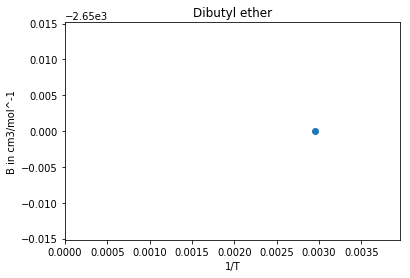

b:[[-2001309.66549179]]
a:[2472.70873908]


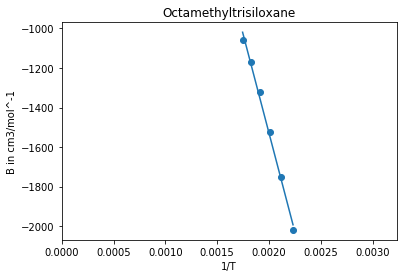

b:[[-1833266.12120779]]
a:[2508.06730696]


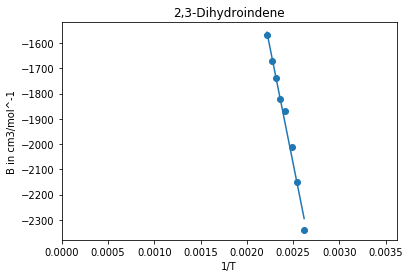

b:[[-4512105.29244165]]
a:[5994.70275512]


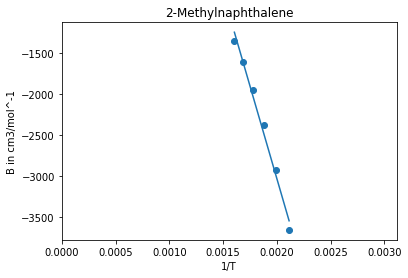

In [6]:
# intially, just fitting a single linear regression and calculating errors to see how well the data conforms to 
#    the model a+b/t

# dictionaries to store mean relative errors and mean absolute errors by compound
MAEs = defaultdict(float)
MREs = defaultdict(float)

# fitting a linear regression for each compound, finding error, and plotting it as to satisfy the equation a + b/t
for compound in compound_data:
    xl = np.reciprocal(compound_data[compound]['T'].tolist()) #using reciprocals of T
    x = np.asarray(xl)
    y = np.asarray(compound_data[compound]['B'].tolist())

    x = x.reshape(len(x), 1)
    y = y.reshape(len(y), 1)

    # fitting model
    regr = linear_model.LinearRegression()
    regr.fit(x, y) 
    
    # display a and b values for the model a+b/t
    print("b:" + str(regr.coef_))
    print("a:" + str(regr.intercept_))
    y_predict = regr.predict(x)
    
    # calculating MAE and MRE of the compound and appending them to dictionary
    MAEs[compound] = np.mean(np.absolute(y_predict - y)) #adding MAE
    MREs[compound] = np.mean(np.absolute((y_predict - y)/y)) #adding MRE

    # plotting regression
    plt.scatter(x, y)
    plt.xlim(0,max(xl)+0.001)
    plt.xlabel("1/T")
    plt.ylabel("B in cm3/mol^-1")
    plt.title(compound)
    plt.plot(x, y_predict)
    plt.show()

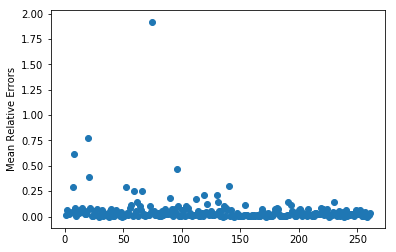

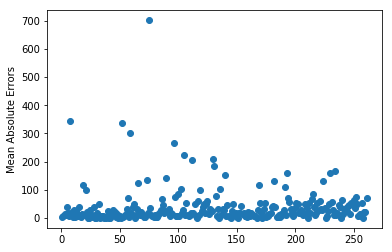

In [7]:
# Plotting all MREs and MAEs calculated above to view how well all compounds generally conform to a+b/t
plt.scatter([num+1 for num in range(len(MREs))], list(MREs.values()))
plt.ylabel('Mean Relative Errors')
plt.show()

plt.scatter([num+1 for num in range(len(MAEs))], list(MAEs.values()))
plt.ylabel('Mean Absolute Errors')
plt.show()

In [10]:
# determining how many compounds fall within a "reasonable range" of MREs and MAEs
# "reasonable range" is determined to be compounds whose MRE and MAE is less than the median MRE and median MAE 
#     of all compounds 

MRE_cutoff = np.median(list(MREs.values()))
MAE_cutoff = np.median(list(MAEs.values()))

usable_compounds = []
for compound in MAEs:
    if MAEs[compound] <= MAE_cutoff and MREs[compound] <= MRE_cutoff: 
        usable_compounds.append(compound)

# concluded that 103/261 compounds fall in this "reasonable range"
# as this is less than 50%, we go on to attempt multiple regressions to bring down these error margins
print("Number of compounds in reasonable range: " + str(len(usable_compounds)))
print("Total number of compounds: " + str(len(compound_data)))

Number of compounds in reasonable range: 103
Total number of compounds: 261


In [11]:
# attempting to fit 2 linear regressions to reduce error margins
# this code is ultimately not vital, as the MultipleLinearRegressions function performs x number of linear regressions
# this simply documents the process of discovering the benefits of more than one regressions

# dictionaries to store mean relative errors and mean absolute errors by compound
MAEs = defaultdict(list)
MREs = defaultdict(list)
MRE_percent_change = []

# fitting 1 and 2 linear regressions for each compound, finding error, and plotting it
for compound in compound_data:
    
    #fitting ONE linear regression
    print("With ONE linear regression...")
    xl = np.reciprocal(compound_data[compound]['T'].tolist()) #using RECIPROCALS of T
    yl = compound_data[compound]['B'].tolist()
    x = np.asarray(xl)
    y = np.asarray(yl)

    x = x.reshape(len(x), 1)
    y = y.reshape(len(y), 1)

    regr = linear_model.LinearRegression()
    regr.fit(x, y) # fitting model
    print("b:" + str(regr.coef_))
    print("a:" + str(regr.intercept_))
    y_predict = regr.predict(x)
   
    MAEs[compound].append(np.mean(np.absolute(y_predict - y))) #adding MAE
    old_MRE = np.mean(np.absolute((y_predict - y)/y)) # used in percent change calcs
    MREs[compound].append(old_MRE) #adding MRE

    # plotting single regression
    plt.scatter(x, y)
    plt.xlim(0,max(xl)+0.001)
    plt.xlabel("1/T")
    plt.ylabel("B in cm3/mol^-1")
    plt.title(compound)
    plt.plot(x, y_predict)
    plt.show()

    # fitting TWO separate regressions for each half of the compound data
    print("With TWO regressions..")
    if len(xl) > 1:
        xl_list = np.reciprocal(compound_data[compound]['T'].tolist()).tolist()
        yl_list = compound_data[compound]['B'].tolist()
    
        # splitting x and y values into two lists 
        xl_first_half = xl_list[:len(xl_list)//2]
        xl_second_half = xl_list[len(xl_list)//2:]
        yl_first_half = yl_list[:len(yl_list)//2]
        yl_second_half = yl_list[len(yl_list)//2:]
    
        x_first_half = np.asarray(xl_first_half)
        x_second_half = np.asarray(xl_second_half)
        y_first_half = np.asarray(yl_first_half)
        y_second_half = np.asarray(yl_second_half)
    
        x_first_half = x_first_half.reshape(len(x_first_half),1)
        x_second_half = x_second_half.reshape(len(x_second_half),1)
        y_first_half = y_first_half.reshape(len(y_first_half),1)
        y_second_half = y_second_half.reshape(len(y_second_half),1)
    
        # performing 2 linear regressions: 1 on the first half of x and y vals and 1 on the second half of x and y vals
        regr.fit(x_first_half, y_first_half)
        print("b1:" + str(regr.coef_))
        print("a1:" + str(regr.intercept_))
        y_predict_first = regr.predict(x_first_half)

        regr.fit(x_second_half, y_second_half)
        print("b2:" + str(regr.coef_))
        print("a2:" + str(regr.intercept_))
        y_predict_second = regr.predict(x_second_half)

        # calculating MAEs by adding MAEs of each regression (commented out as MAE is unused)
       # first_half_absolute = np.absolute(y_predict_first - y_first_half)
       # second_half_absolute = np.absolute(y_predict_second - y_second_half)
       # MAEs[compound].append(np.mean(np.concatenate((first_half_absolute, second_half_absolute))))

        # calculating mean relative error and percent change in MRE from one regression to two regressions
        # doing percent change calcs for MRE rather than MAE because of variance in data from compound to compound
        if 0 not in y_first_half and 0 not in y_second_half:
            first_half_relative = np.absolute((y_predict_first - y_first_half)/y_first_half)
            second_half_relative = np.absolute((y_predict_second - y_second_half)/y_second_half)
            new_MRE = np.mean(np.concatenate((first_half_relative, second_half_relative)))
            MREs[compound].append(new_MRE)
            MRE_percent_change.append((new_MRE - old_MRE)/old_MRE * 100)
  
      # plotting both regressions on same plot
        plt.scatter(x, y)
        plt.xlim(0,max(xl)+0.001)
        plt.xlabel("1/T")
        plt.ylabel("B in cm3/mol^-1")
        plt.title(compound)
        plt.plot(x_first_half, y_predict_first)
        plt.plot(x_second_half, y_predict_second)
        plt.show()

        print("MAEs" + str(MAEs[compound]))
        print("MREs" + str(MREs[compound]))
        print('')
        print('')

average_MRE_percent_decrease = np.nanmean(MRE_percent_change)
median_MRE_percent_decrease = np.nanmedian(MRE_percent_change)
print("Average MRE percent change is " + str(average_MRE_percent_decrease) + "%")        
print("Median MRE percent change median is " + str(median_MRE_percent_decrease) + "%") 

# results: When two linear regressions are used, MRE decreases an average of 65.8%
#          and the median MRE percent decrease is 67.3% 
# Clearly, performing multiple regressions makes significant changes to error margins, so we will go onto investigate
#    the benefits and consequences of performing multiple linear regressions

With ONE linear regression...
b:[[-131855.01426619]]
a:[153.84151974]
With TWO regressions..
b1:[[-149326.9438573]]
a1:[209.41489689]
b2:[[-110566.4383769]]
a2:[95.54479609]
MAEs[4.407127699132005]
MREs[0.019312335721697122, 0.01502119911724648]


With ONE linear regression...
b:[[-140576.41376922]]
a:[238.93430143]
With TWO regressions..
b1:[[-162969.67133129]]
a1:[319.84796146]
b2:[[-116349.16264671]]
a2:[178.21754158]
MAEs[8.02243503326016]
MREs[0.06461500151301092, 0.014365747805130684]


With ONE linear regression...
b:[[-287039.73713565]]
a:[481.84849631]
With TWO regressions..
b1:[[-333870.11162006]]
a1:[651.44010436]
b2:[[-206191.57082227]]
a2:[271.59154692]
MAEs[14.868310692844611]
MREs[0.04254387484048473, 0.016520108806878018]


With ONE linear regression...
b:[[-318578.43961306]]
a:[387.37475239]
With TWO regressions..
b1:[[-264766.64251062]]
a1:[248.159696]
b2:[[-403209.74591578]]
a2:[577.08644097]
MAEs[9.063276215213678]
MREs[0.024892327909500238, 0.007735434195817766]




/Users/RoRo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:87: RuntimeWarning: invalid value encountered in double_scalars


a:[518.67404352]
With TWO regressions..
b1:[[-469939.23232184]]
a1:[1100.25232667]
b2:[[-319678.52967375]]
a2:[562.82795077]
MAEs[30.64434868417244]
MREs[0.06524214061196207, 0.0601831375964681]


With ONE linear regression...
b:[[-1161729.13758481]]
a:[2236.39337057]
With TWO regressions..
b1:[[-2243963.04705768]]
a1:[5287.79914551]
b2:[[-609015.66328167]]
a2:[985.91134956]
MAEs[125.23306830552217]
MREs[0.24954518469802994, 0.10009001629506997]


With ONE linear regression...
b:[[-741758.86586082]]
a:[1577.01821856]
With TWO regressions..
b1:[[0.]]
a1:[-1066.]
b2:[[-532909.71648]]
a2:[890.328]
MAEs[9.179844862601536]
MREs[0.01018080953222777, 0.0]


With ONE linear regression...
b:[[-641887.2378856]]
a:[1250.11394374]
With TWO regressions..
b1:[[-916093.41730532]]
a1:[2219.98393078]
b2:[[-603257.46075406]]
a2:[1125.38782411]
MAEs[20.82397653402618]
MREs[0.024041179501596243, 0.01068166593627412]


With ONE linear regression...
b:[[-933548.68051326]]
a:[1399.56639532]
With TWO regressi

MAEs[18.043015759561833]
MREs[0.01601922136061297, 0.005459110607066429]


With ONE linear regression...
b:[[-1694830.14589504]]
a:[3393.80288284]
With TWO regressions..
b1:[[-1830059.57155439]]
a1:[3789.60206785]
b2:[[-1203779.03044907]]
a2:[2070.8515594]
MAEs[49.993310634128285]
MREs[0.03593176501536672, 0.02220401986793975]


With ONE linear regression...
b:[[-790216.01981771]]
a:[1391.72268193]
With TWO regressions..
b1:[[-7208291.07625907]]
a1:[22574.33093525]
b2:[[-1032351.81827309]]
a2:[2114.3875502]
MAEs[59.6664019682396]
MREs[0.05160058226680582, 2.237500166372051e-16]


With ONE linear regression...
b:[[-861074.86246904]]
a:[1244.49804532]
With TWO regressions..
b1:[[-929575.42460047]]
a1:[1433.84688604]
b2:[[-1114199.48399481]]
a2:[1858.92892242]
MAEs[13.594949100100393]
MREs[0.014171805270814363, 0.010182388082125307]


With ONE linear regression...
b:[[-1279198.1998972]]
a:[2380.22521307]
With TWO regressions..
b1:[[-1850086.92096232]]
a1:[4057.66967982]
b2:[[-1116786.1609

MAEs[40.31195684328815]
MREs[0.07649571004509777, 0.03463928235678654]


With ONE linear regression...
b:[[-598911.63297241]]
a:[865.22383274]
With TWO regressions..
b1:[[-810875.3664574]]
a1:[1536.42781304]
b2:[[-458039.21182057]]
a2:[564.06016538]
MAEs[43.761119803111164]
MREs[0.0831110234532476, 0.02071679125914417]


With ONE linear regression...
b:[[-3116033.87669164]]
a:[6562.70629418]
With TWO regressions..
b1:[[-8089200.00000001]]
a1:[20558.]
b2:[[-1810820.77672025]]
a2:[3220.73799522]
MAEs[131.51395967251537]
MREs[0.07239464974214953, 0.002380583258707952]


With ONE linear regression...
b:[[-1374994.3201815]]
a:[2510.74438156]
With TWO regressions..
b1:[[0.]]
a1:[-1771.]
b2:[[-914581.6944]]
a2:[1245.976]
MAEs[38.45758770788052]
MREs[0.027514474703232095, 0.0]


With ONE linear regression...
b:[[-893951.67631697]]
a:[1426.35406905]
With TWO regressions..
b1:[[-891186.74825]]
a1:[1418.055]
b2:[[-970928.57925]]
a2:[1663.795]
MAEs[2.2553367149607766]
MREs[0.001634383326557444, 1.

MAEs[8.804890587616796]
MREs[0.020258297627214723, 0.017087338915889885]


With ONE linear regression...
b:[[-782367.01593461]]
a:[1089.70575515]
With TWO regressions..
b1:[[-825983.45949472]]
a1:[1227.63674308]
b2:[[-709370.76167815]]
a2:[937.6918208]
MAEs[15.877597157485752]
MREs[0.02304403734018632, 0.017067334335667744]


With ONE linear regression...
b:[[-925632.70920388]]
a:[1422.62246309]
With TWO regressions..
b1:[[-1129130.51927591]]
a1:[2044.84615083]
b2:[[-581986.71502969]]
a2:[701.85236829]
MAEs[54.349711323904344]
MREs[0.083215656965403, 0.016475214699766396]


With ONE linear regression...
b:[[-901161.95773085]]
a:[1374.09155943]
With TWO regressions..
b1:[[-1003222.8580482]]
a1:[1683.76441185]
b2:[[-755553.77118238]]
a2:[1068.44271367]
MAEs[29.772947347884593]
MREs[0.04385066766540516, 0.02686989609668598]


With ONE linear regression...
b:[[-906234.62689395]]
a:[1330.45523743]
With TWO regressions..
b1:[[-1283089.30697066]]
a1:[2429.77654298]
b2:[[-720115.23101083]]
a2:

In [12]:
# helper function to split a list into wanted_parts sublists
def split_list(alist, wanted_parts=1): 
    """
    Helper function to split a list into sublists 
    @param alist: list to be split into parts
    @param wanted_parts: number of parts to split the list into 
    """
    length = len(alist) 
    return [ alist[i*length // wanted_parts: (i+1)*length // wanted_parts] for i in range(wanted_parts) ]

In [37]:
def multiple_linear_regressions(compound, num_regressions, display_graphs=False): 
    """
    Function to perform x linear regressions on a compound's dataset using Akaike Info Criteria to determine if model 
    improved, considering extra params
    @param compound: string denoting the name of the compound, whose data is found in compound_data dictionary 
    @param num_regressions: number of linear regressions to be performed 
    @param display_graphs: boolean flag. if true, display graphs, else no display
    @return: list containing AIC, and x,y data to graph
    """
   # print("With %d regressions.." % num_regressions)
    xl_list = np.reciprocal(compound_data[compound]['T'].tolist()).tolist()
    yl_list = compound_data[compound]['B'].tolist()
    AIC = None
    
    if len(xl_list) >= num_regressions:
        # splitting list by number specified as num_regressions
        x_portions = split_list(xl_list, num_regressions)
        y_portions = split_list(yl_list, num_regressions) 
        y_preds = []
        regr = linear_model.LinearRegression()

        # performing regressions on each portion
        for portion in range(num_regressions):
            x_portions[portion] = np.asarray(x_portions[portion])
            x_portions[portion] = x_portions[portion].reshape(len(x_portions[portion]), 1)
            y_portions[portion] = np.asarray(y_portions[portion])
            y_portions[portion] = y_portions[portion].reshape(len(y_portions[portion]), 1)
    
    
            regr.fit(x_portions[portion], y_portions[portion])
         #   print("b" + str(portion+1) + ": " + str(regr.coef_))
         #   print("a" + str(portion+1) + ": " + str(regr.intercept_))

            predicted_y_vals = regr.predict(x_portions[portion])
            
            for val in predicted_y_vals: 
                y_preds.append(val[0])
                
        y_preds = np.asarray(y_preds)
  
        # plotting regressions if flag is set to true
        if display_graphs:
          # plotting both regression on same plot
            plt.scatter(xl_list, yl_list)
            plt.xlim(0,max(xl_list)+0.001)
            plt.xlabel("1/T")
            plt.ylabel("B in cm3/mol^-1")
            plt.title(compound)
            plt.plot(xl_list, y_preds)
            plt.show()
      
        # calculating maximum likelihood, which is to be used in AIC calcs
        max_likelihood = 0
        for i in range(len(yl_list)):
            max_likelihood += (y_preds[i] - yl_list[i])**2
        max_likelihood = max_likelihood/len(yl_list)
        
        
        K = 2 * num_regressions 
        n = len(xl_list)
        
        #using first order AIC for large samples (more than 40 datapoints), and second order for smaller samples (<40)
        if len(xl_list) > 40: 
            AIC = -2 * max_likelihood + 2 * K
        else:
            if n-K-1 != 0:
                AIC = -2* max_likelihood + 2*K + (2*K*(K+1)/(n-K-1))
        
    return [AIC, xl_list, yl_list, y_preds]

In [40]:
def find_optimal_num_regressions(compound):
    """
    Find optimal number of regressions based on the AIC calculated in multiple_linear_regressions
    @param compound: compound name string to reference compound_data
    @return: number of linear regressions that minimizes AIC
    """
    AIC_data = []
    
    # conducting 1...n/2 linear regressions where n is the length of the list
    #   this is because more than n/2 linear regressions is a linear interpolation (a direct line to each point)
    for num in range(1, len(compound_data[compound])//2):#//2 + 1):
        data = multiple_linear_regressions(compound, num, False)
        AIC_data.append(data[0])
        xl_list = data[1]
        yl_list = data[2]
        y_preds = data[3]
        
    clean_AIC_data = [x for x in AIC_data if x is not None] #using AIC if it was able to be calculated
    
    if clean_AIC_data != []:
        optimal_num_regressions = clean_AIC_data.index(min(clean_AIC_data)) + 1
        
        # if AIC is minimized by more than one regression, display info 
        if optimal_num_regressions > 1:
            print("Num elements in dataset is " + str(len(compound_data[compound])))
            print("Optimal number of regressions is " + str(optimal_num_regressions))
            print("AIC was " + str(min(clean_AIC_data)))
            plt.scatter(xl_list, yl_list)
            plt.xlim(0,max(xl_list)+0.001)
            plt.xlabel("1/T")
            plt.ylabel("B in cm3/mol^-1")
            plt.title(compound)
            plt.plot(xl_list, y_preds)
            plt.show()
        return optimal_num_regressions


In [41]:
print(len(compound_data))
counter = 0
for compound in compound_data:
   # print(compound + ": " + str(findOptimalNumRegressions(compound)))
    optimal = find_optimal_num_regressions(compound)
    if optimal is not None and optimal>1: 
        counter+=1

# conclusion: for every compound, 1 linear regression is optimal (as we exclude n/2 linear regressions). 
#             however, when we perform 1..n linear regressions instead of 1..n/2 linear regressions, n/2 regressions
#             are optimal for compounds with fewer data points (<40). This may have to do with how AIC is calculated

261


In [42]:
print(counter) # number of compounds that require more than one linear regression to minimize AIC

0
